In [149]:
from hossam import load_data
from hossam.util import hs_load_data
from matplotlib import pyplot as plt
from matplotlib import font_manager as fm
import seaborn as sb
import numpy as np
import pandas as pd
from pandas import DataFrame

import statsmodels.api as sm
from statsmodels.stats.diagnostic import linear_reset
from scipy.stats import zscore, probplot, shapiro, anderson, pearsonr
from statsmodels.stats.api import het_breuschpagan
from statsmodels.stats.stattools import durbin_watson
from scipy.stats import spearmanr

from itertools import combinations
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [150]:
my_dpi = 200
font_path = "../data_visualization/NotoSansKR-Regular.ttf"
fm.fontManager.addfont(font_path)
font_prop = fm.FontProperties(fname=font_path)
font_name = font_prop.get_name()
my_font_name = "Noto Sans KR"
my_theme = "dark"

sb.set_theme(style=my_theme)
plt.rcParams['font.family'] = my_font_name
plt.rcParams['font.size'] = 5
plt.rcParams['axes.unicode_minus'] = False

In [151]:
origin = hs_load_data('california_cluster.xlsx')

print("\n===== 데이터 크기 확인 =====")
print(f"데이터셋 크기 : {origin.shape}")
print(f"열 개수: {origin.shape[1]}")
print(f"행 개수: {origin.shape[0]}")

origin.head()


✅ 테이블 정보
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   longitude   20640 non-null  float64
 1   latitude    20640 non-null  float64
 2   housing_me  20640 non-null  int64  
 3   total_room  20640 non-null  int64  
 4   total_bedr  20433 non-null  float64
 5   population  20640 non-null  int64  
 6   households  20640 non-null  int64  
 7   median_inc  20640 non-null  float64
 8   median_hou  20640 non-null  int64  
 9   ocean_prox  20640 non-null  object 
 10  CLUSTER_ID  20640 non-null  int64  
dtypes: float64(4), int64(6), object(1)
memory usage: 1.7+ MB


✅ 상위 5개 행
+---+-----------+----------+------------+------------+------------+------------+------------+-------------------+------------+------------+------------+
|   | longitude | latitude | housing_me | total_room | total_bedr | population | households |    median_inc     | median_

,longitude,latitude,housing_me,total_room,total_bedr,population,households,median_inc,median_hou,ocean_prox,CLUSTER_ID
0,-122.23,37.88,41,880,129.0,322,126,8.3252,452600,NEAR BAY,5
1,-122.22,37.86,21,7099,1106.0,2401,1138,8.3014,358500,NEAR BAY,5
2,-122.24,37.85,52,1467,190.0,496,177,7.2574,352100,NEAR BAY,5
3,-122.25,37.85,52,1274,235.0,558,219,5.6431,341300,NEAR BAY,5
4,-122.25,37.85,52,1627,280.0,565,259,3.8462,342200,NEAR BAY,5


In [152]:
# 컬럼명 기존 코드대로 맞추기
origin.columns = ['longitude', 'latitude', 'housing_median_age', 'total_rooms',
                  'total_bedrooms', 'population', 'households',
                  'median_income', 'median_house_value', 'ocean_proximity','CLUSTER_ID']
df = origin.copy()
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,CLUSTER_ID
0,-122.23,37.88,41,880,129.0,322,126,8.3252,452600,NEAR BAY,5
1,-122.22,37.86,21,7099,1106.0,2401,1138,8.3014,358500,NEAR BAY,5
2,-122.24,37.85,52,1467,190.0,496,177,7.2574,352100,NEAR BAY,5
3,-122.25,37.85,52,1274,235.0,558,219,5.6431,341300,NEAR BAY,5
4,-122.25,37.85,52,1627,280.0,565,259,3.8462,342200,NEAR BAY,5


In [153]:
print("\n===== 데이터 타입 확인 =====")
print(df.info())


===== 데이터 타입 확인 =====
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  int64  
 3   total_rooms         20640 non-null  int64  
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  int64  
 6   households          20640 non-null  int64  
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  int64  
 9   ocean_proximity     20640 non-null  object 
 10  CLUSTER_ID          20640 non-null  int64  
dtypes: float64(4), int64(6), object(1)
memory usage: 1.7+ MB
None


### 미션 1. 이 데이터의 신뢰성
- 1. 결측치, 이상치, 편향 점검 - 처리 기준 제시
- 2. 주요 변수의 범위가 현실적인지 판단
- 3. 특정 변수의 데이터 확인 및 영향 검토(housing_median_age의 값이 52인 값들)
- 4. 전처리 전,후가 어떻게 달라졌는지 한눈에 비교하는 표나 요약

In [154]:
# 1. 결측치, 이상치, 편향 점검 - 처리 기준 제시
print("\n===== 결측치 확인 =====")
print(df.isnull().sum())


===== 결측치 확인 =====
longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
CLUSTER_ID              0
dtype: int64


- 버리지 않기 위해 중앙값으로 대체

In [155]:
# 중앙값으로 결측치 대체
df['total_bedrooms'].fillna(df['total_bedrooms'].median(), inplace=True)
print("\n===== 결측치 대체 후 확인 =====")
df.isnull().sum()


===== 결측치 대체 후 확인 =====


C:\Users\itwill\AppData\Local\Temp\ipykernel_10532\2372486251.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['total_bedrooms'].fillna(df['total_bedrooms'].median(), inplace=True)


longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
CLUSTER_ID            0
dtype: int64

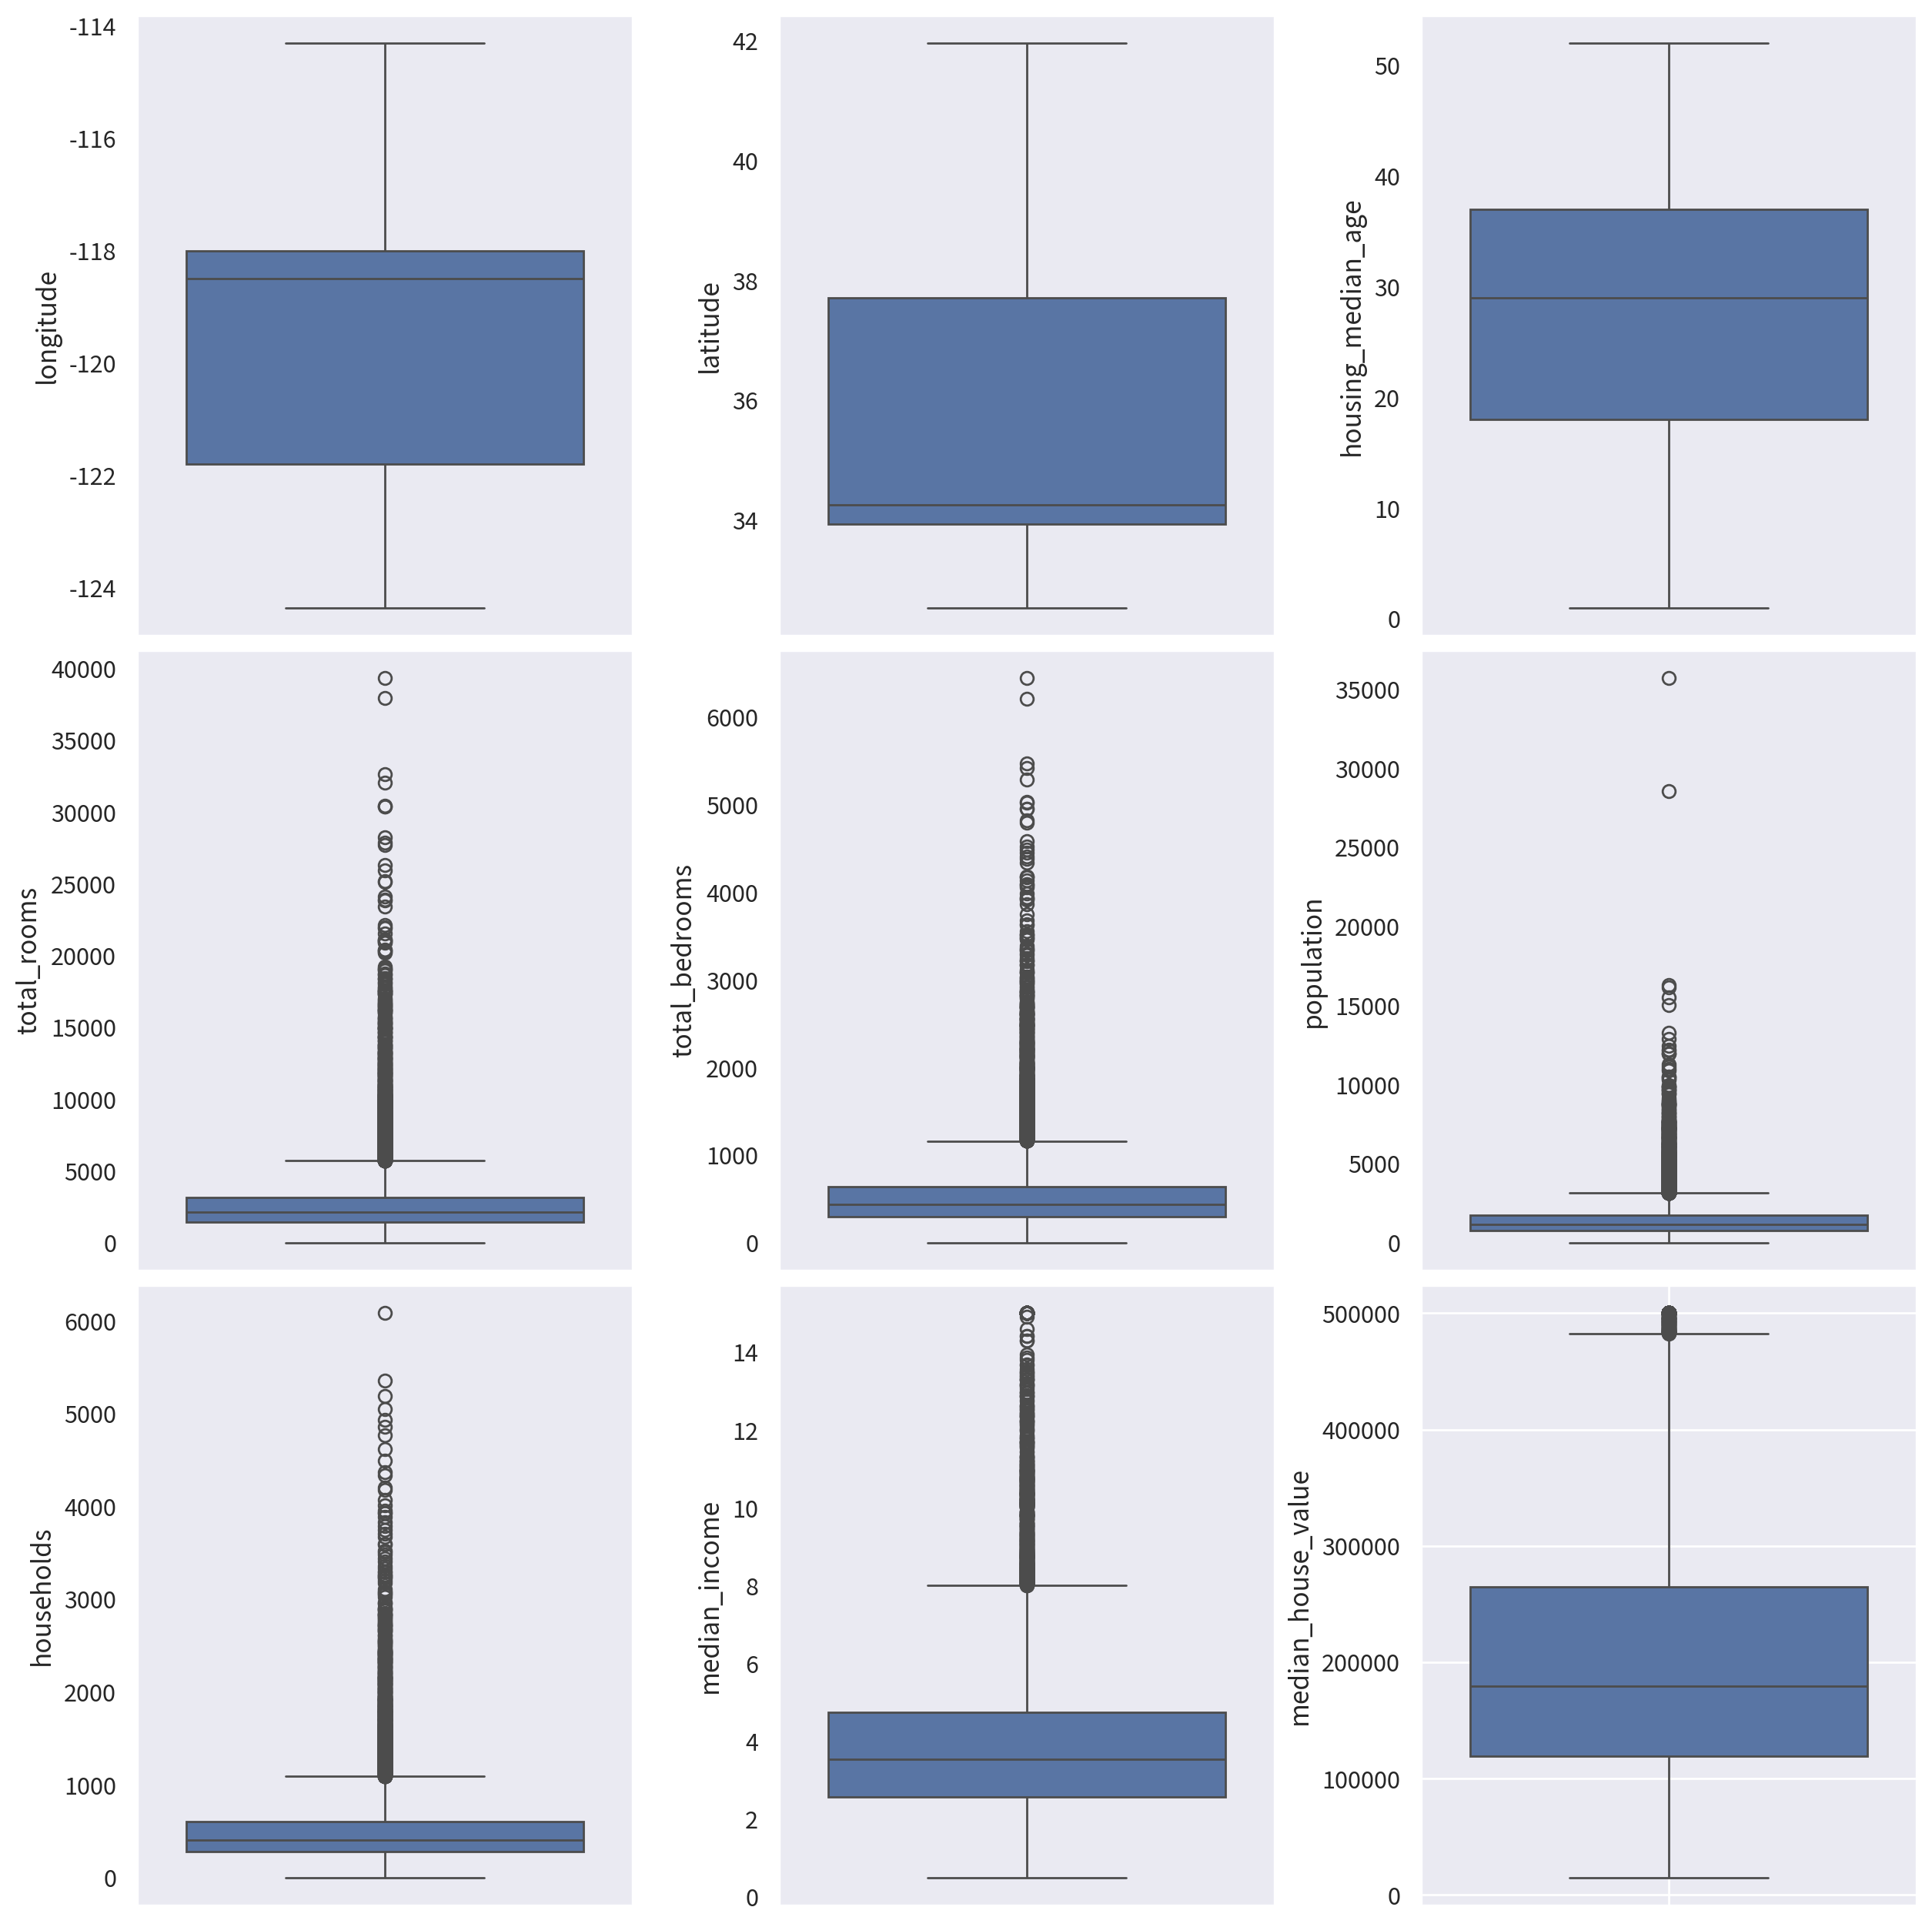

In [156]:
# 이상치를 알기 위해 박스플롯 시각화
# 1) 그래프 초기화 (캔버스(fig)와 도화지(ax) 준비하기)
width_px = 2500             #그래프 가로 크기
height_px = 2500             #그래프 세로 크기
rows = 3                    #도화지의 행 수
cols = 3                    #도화지의 열 수
figsize = (width_px / my_dpi, height_px / my_dpi)
fig, ax = plt.subplots(rows, cols, figsize = figsize, dpi = my_dpi)

# 2) 그래프 그리기 -> seaborn 사용
sb.boxplot(data=df['longitude'],orient='v',ax=ax[0][0])
sb.boxplot(data=df['latitude'],orient='v',ax=ax[0][1])
sb.boxplot(data=df['housing_median_age'],orient='v',ax=ax[0][2])
sb.boxplot(data=df['total_rooms'],orient='v',ax=ax[1][0])
sb.boxplot(data=df['total_bedrooms'],orient='v',ax=ax[1][1])
sb.boxplot(data=df['population'],orient='v',ax=ax[1][2])
sb.boxplot(data=df['households'],orient='v',ax=ax[2][0])
sb.boxplot(data=df['median_income'],orient='v',ax=ax[2][1])
sb.boxplot(data=df['median_house_value'],orient='v',ax=ax[2][2])

# 3) 그래프 꾸미기 -> 도화지(ax)에 직접 적용
plt.grid(True)

# 4) 출력
plt.tight_layout()                      #여백 제거
# plt.savefig("myplot.png", dpi=my_dpi)   #생략 가능
plt.show()                              #그래프 화면 출력
plt.close()                             #그래프 작업 종료

- 위도와 경도, 집의 나이 중위 수를 제외한 모든 컬럼에 이상치가 존재함
    - 이상치지만 틀린 데이터가 아니라 현실성에 가까운 데이터
    - 해당 데이터는 지역(블록 그룹)이라는 특성을 가진 데이터이기 때문에 규모가 클 수 있음.
        - 인구값이 5000이라면 방이 1만개인것은 이론상 가능한 수치라고 생각
    - 1940년 이전 주택이 52로 코딩되는 것은 상한선을 정해둔듯 함. median_house_value 같은 경우도 최댓값이 500,001로 되어있는 것을 보아 50만 달러가 넘어가는 데이터는 50.1만 달러로 상한선을 정해둠
        - 상한선이 정해져있기 때문에 50만 달러가 넘는 값을 예측하게 되면 성능이 떨어질 수 있음.
        - 상한선을 넘는 값을 예측하기 위해서는 추가적인 데이터가 필요함

In [157]:
# #- 3. 특정 변수의 데이터 확인 및 영향 검토(housing_median_age의 값이 52인 값들)
# # 상한선에 해당하는 데이터의 개수를 파악하기
# print(df['median_house_value'].count())
# print(df[df['median_house_value'] > 500000]['median_house_value'].count())
# print(f"상한선 초과 데이터 비율: {df[df['median_house_value'] > 500000]['median_house_value'].count() / df['median_house_value'].count() * 100:.2f}%")

# print(df['housing_median_age'].count())
# print(df[df['housing_median_age'] == 52]['housing_median_age'].count())
# print(f"상한선 초과 데이터 비율: {df[df['housing_median_age'] == 52]['housing_median_age'].count() / df['housing_median_age'].count() * 100:.2f}%")

- median_house_value 와 housing_median_age 값의 상한선처럼 걸려있는 값들이 분석에 영향을 줄 수 있다고 판단 -> 소득이 올라가도 집 값은 안올라간다고 착각할 수 있고, 실제로 50만 달러가 아닌 집임에도 50만 달러를 학습시키는 것과 같은 효과
    - 분석 목적인 캘리포니아의 주거 시장을 이해하기 위해 상한선 값을 제거한 데이터를 가지고 분석 진행
    - 을 하려 했으나 CLUSTER_ID로 묶게 되었으니 새로운 분석 시작
    - CLUSTER_ID별로 분석 주제를 달리할 필요가 있을 거 같음
        - 예시
            - 각 클러스터 번호 간의 차이점을 서술할 수 있음
                - 클러스터간 가격 차이가 나는 이유 (연속형 변수들로 설명 가능)
                - 
            - 각 클러스터 번호 속의 자기들끼리의 가격 차이를 서술

In [219]:
# 상한선 제거 데이터 프레임은 df_cleaned 로 저장
# 상한선 제거 하지 않은 데이터 프레임은 df 로 저장
# 추후 두 데이터를 가지고 비교 분석 진행
# df_cleaned = df[(df['median_house_value'] <= 500000) & (df['housing_median_age'] < 52)]
# print(f"상한선 제거 전 데이터셋 크기 : {df.shape}")
# print(f"상한선 제거 후 데이터셋 크기 : {df_cleaned.shape}")
# print(f"제거된 데이터 비율: {(df.shape[0] - df_cleaned.shape[0]) / df.shape[0] * 100:.2f}%")
df_cleaned = df.copy()

In [222]:
df_cleaned.groupby('CLUSTER_ID')[[
    'median_income',
    'population',
    'households',
    'housing_median_age',
    'median_house_value'
]].mean()


,median_income,population,households,housing_median_age,median_house_value
CLUSTER_ID,,,,,
0,2.473357,1013.187228,392.563135,24.609579,92235.120464
1,3.567936,1533.663114,555.000927,22.191844,178013.971733
2,3.012095,1275.677179,428.440367,25.101491,122398.119839
3,3.138793,1262.676420,452.696644,25.057229,125858.434165
4,4.087599,1543.423081,519.547590,30.239128,229921.254523
5,4.468237,1351.004144,501.369664,32.151886,263110.929548


In [159]:
print("전처리 전 데이터셋 기술통계량 \n")
origin.describe()

전처리 전 데이터셋 기술통계량 



,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,CLUSTER_ID
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909,3.505039
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874,1.383692
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000,0.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000,3.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000,4.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000,4.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000,5.000000


In [160]:
print("전처리 후 데이터셋 기술통계량 \n")
df_cleaned.describe()

전처리 후 데이터셋 기술통계량 



,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,CLUSTER_ID
count,18572.000000,18572.000000,18572.000000,18572.000000,18572.000000,18572.000000,18572.000000,18572.000000,18572.000000,18572.000000
mean,-119.484929,35.593231,26.983847,2668.840997,546.829636,1470.392957,508.721355,3.693262,189607.608066,3.429518
std,1.980865,2.147712,11.431815,2223.829793,427.347789,1162.944307,389.567263,1.570045,95790.237279,1.391969
min,-124.300000,32.540000,1.000000,2.000000,2.000000,3.000000,2.000000,0.499900,14999.000000,0.000000
25%,-121.550000,33.920000,17.000000,1454.750000,301.000000,811.000000,284.000000,2.537275,115400.000000,3.000000
50%,-118.450000,34.240000,27.000000,2142.000000,438.000000,1203.000000,416.000000,3.468350,171200.000000,4.000000
75%,-117.970000,37.670000,36.000000,3184.000000,655.000000,1781.000000,614.000000,4.616100,243225.000000,4.000000
max,-114.310000,41.950000,51.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500000.000000,5.000000


- 총 데이터 건 수 20640 -> 18572 (약 10% 삭제)
- 결측치 = 0 (total_bedrooms의 결측치를 total_rooms와의 비율로 대체)
- 이상치 처리 = 상한선이라고 판단되는 값(500,001 | 52)들 삭제 진행
    - 일반적인 캘리포니아의 주거 시장을 알아보기 위해서 삭제

### 미션 2. 가격과 핵심 변수의 첫 인상
- 1. median_house_value, median_income, housing_median_age, total_rooms 분포를 히스토그램/KDE로 확인 및 객관적 사실 서술
- 2. 왜도/이상치가 회귀에 줄 수 있는 영향과 변환할 필요가 있는지 서술
- 3. 분포 비교는 동일 축 스케일로 제시하고, 평균/중앙값/꼬리의 차이를 문장으로 요약
- 4. 지역별(Latitude/Longitude) 편향이나 시계열 문제(1990년 데이터만)가 해석에 미치는 영향도 짧게 언급

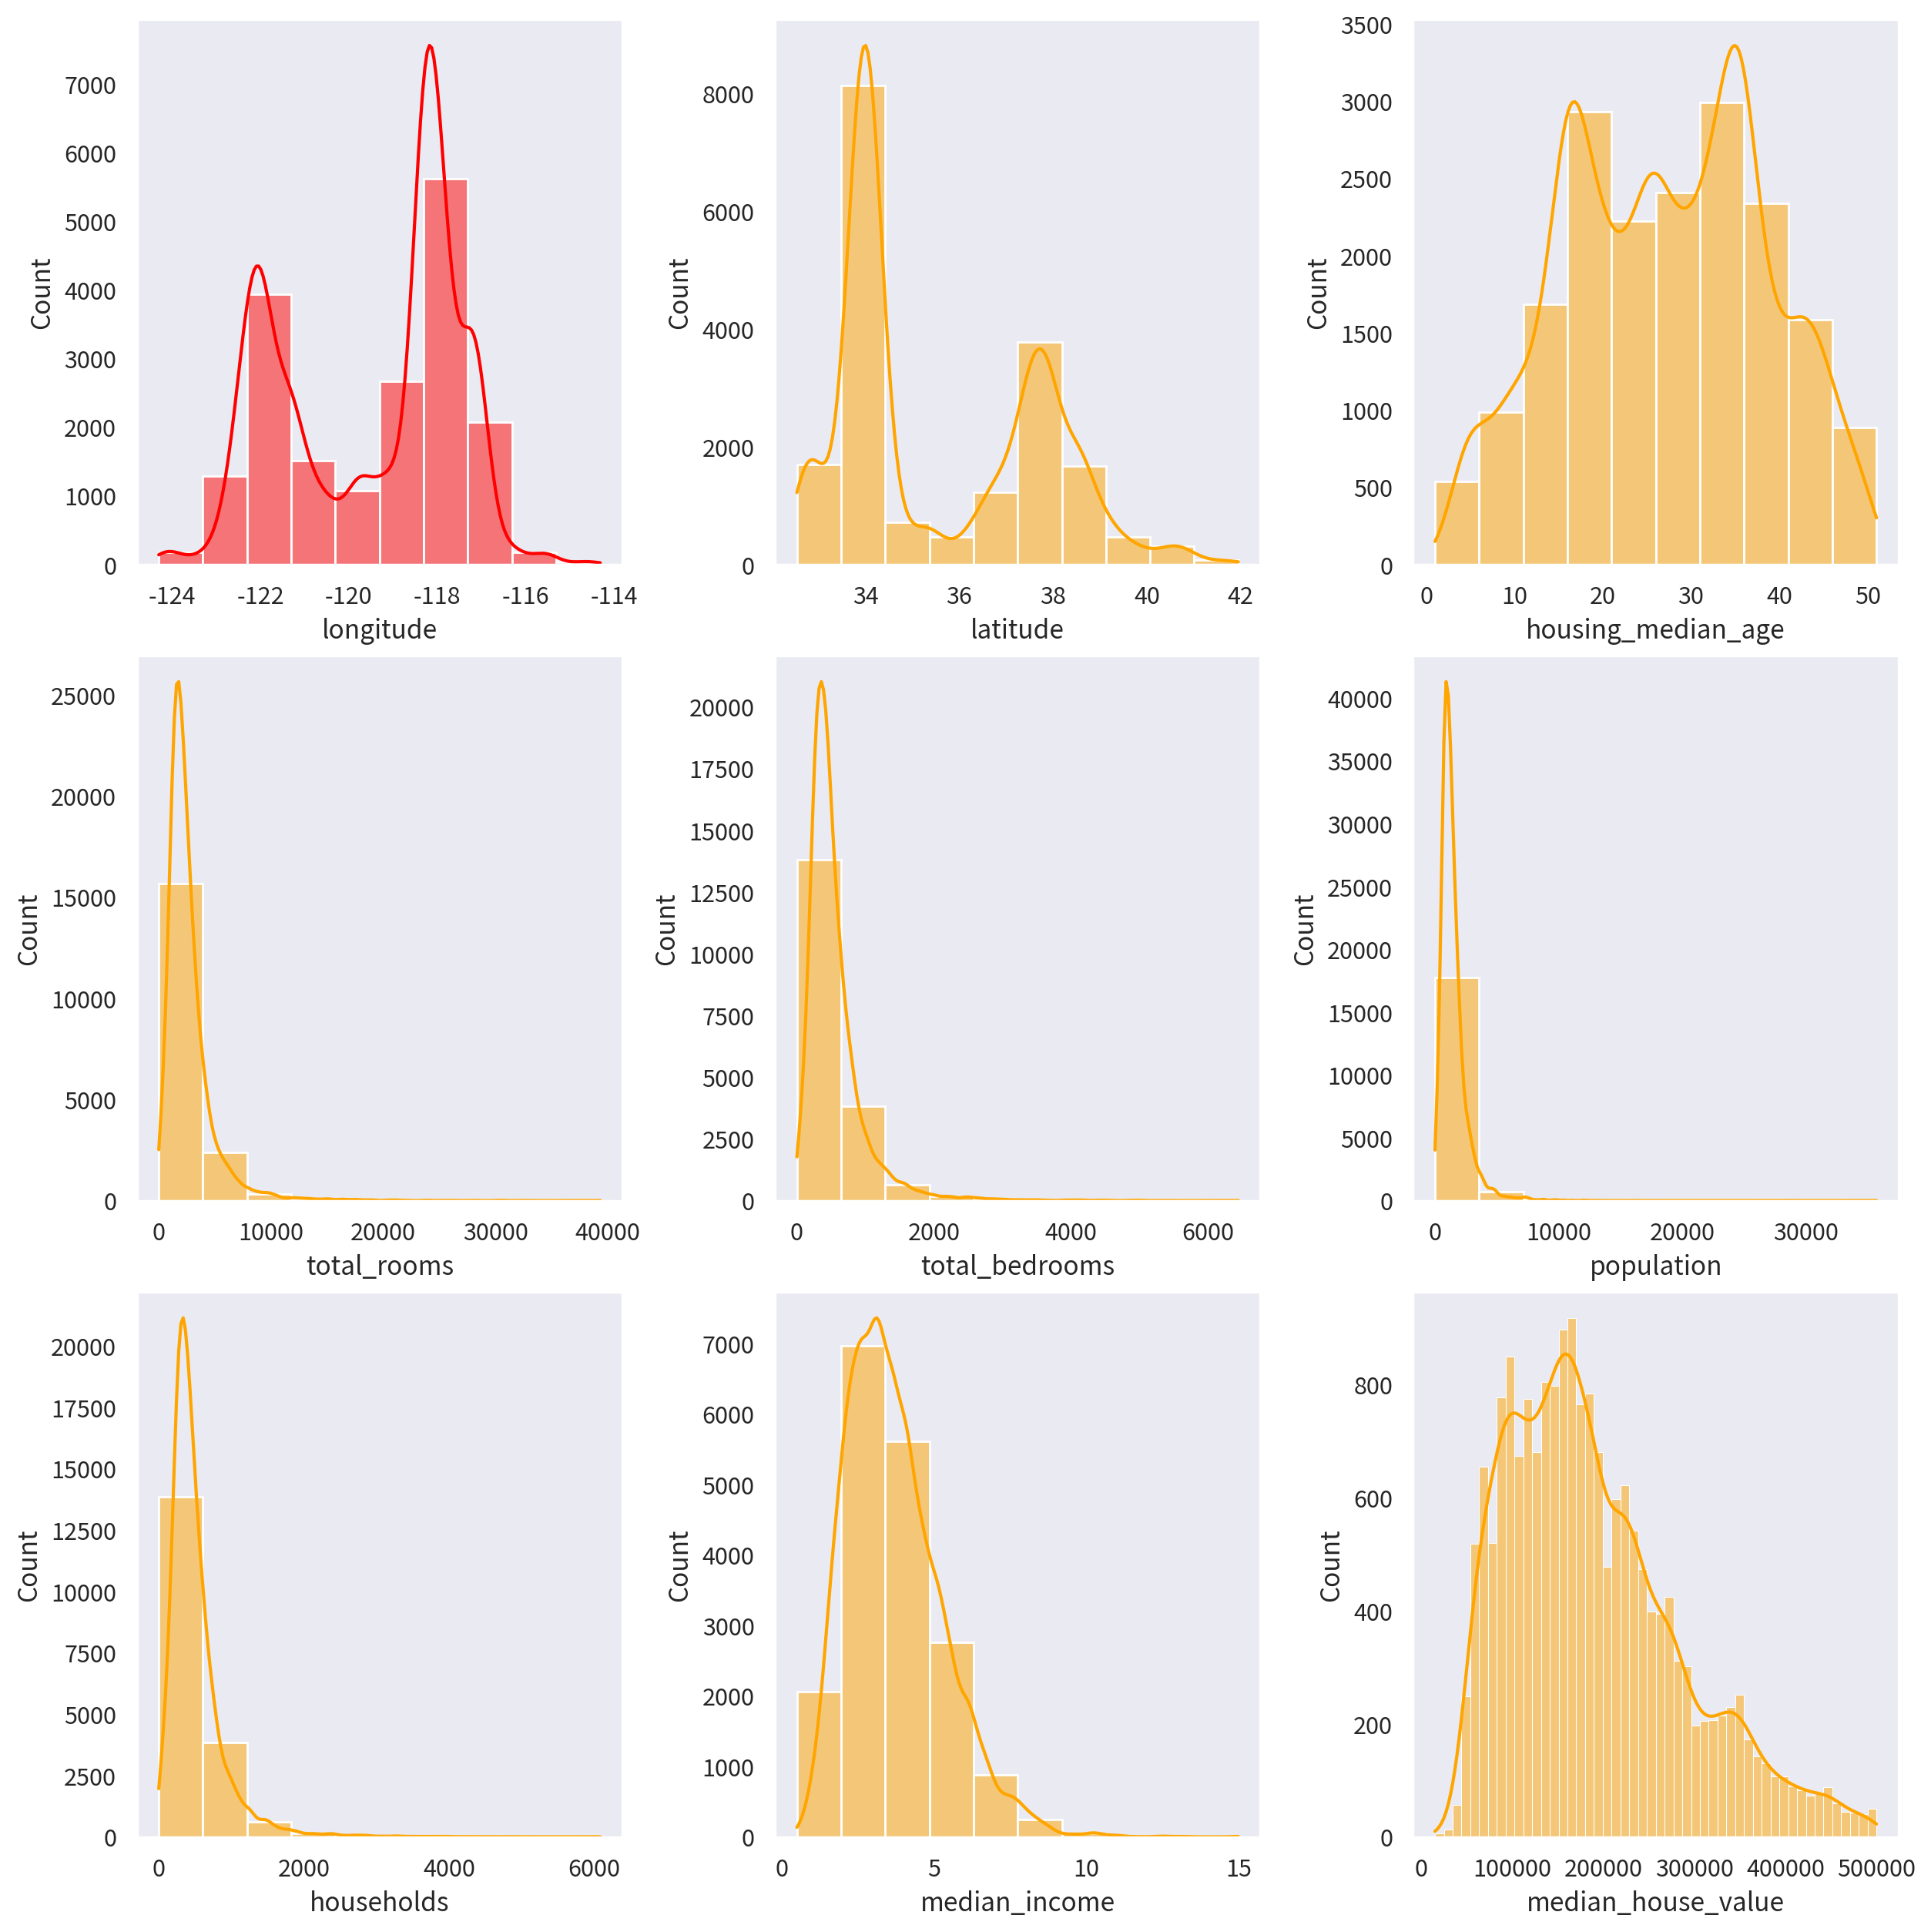

In [161]:
#1. median_house_value, median_income, housing_median_age, total_rooms 분포를 히스토그램/KDE로 확인 및 객관적 사실 서술
# 1) 그래프 초기화 (캔버스(fig)와 도화지(ax) 준비하기)
width_px = 2500             #그래프 가로 크기
height_px = 2500             #그래프 세로 크기
rows = 3                    #도화지의 행 수
cols = 3                    #도화지의 열 수
figsize = (width_px / my_dpi, height_px / my_dpi)
fig, ax = plt.subplots(rows, cols, figsize = figsize, dpi = my_dpi)

# 2) 그래프 그리기 -> seaborn 사용
sb.histplot(data=df_cleaned, x='longitude', bins=10, kde=True, color='red', ax=ax[0,0])
sb.histplot(data=df_cleaned, x='latitude', bins=10, kde=True, color='orange', ax=ax[0,1])
sb.histplot(data=df_cleaned, x='housing_median_age', bins=10, kde=True, color='orange', ax=ax[0,2])
sb.histplot(data=df_cleaned, x='total_rooms', bins=10, kde=True, color='orange', ax=ax[1,0])
sb.histplot(data=df_cleaned, x='total_bedrooms', bins=10, kde=True, color='orange', ax=ax[1,1])
sb.histplot(data=df_cleaned, x='population', bins=10, kde=True, color='orange',ax=ax[1,2])
sb.histplot(data=df_cleaned, x='households', bins=10, kde=True, color='orange',ax=ax[2,0])
sb.histplot(data=df_cleaned, x='median_income', bins=10, kde=True, color='orange',ax=ax[2,1])
sb.histplot(data=df_cleaned, x='median_house_value', bins=50, kde=True, color='orange',ax=ax[2,2])

# 3) 그래프 꾸미기 -> 도화지(ax)에 직접 적용


# 4) 출력
plt.tight_layout()                      #여백 제거
# plt.savefig("myplot.png", dpi=my_dpi)   #생략 가능
plt.show()                              #그래프 화면 출력
plt.close()                             #그래프 작업 종료

- 객관적 사실 서술
    - housing_median_age의 경우 상한선 값을 삭제하면서 비교적 고루게 분포해있는 모습을 알 수 있음
    - total_rooms, total_bedrooms, population,households의 경우 우편향이 매우 심함, 비율로 변환하기 위해 로그 변환 적용이 필요해보임
        - 왼쪽을 기준으로 최빈값-중앙값-평균순으로 나타나며 오른쪽으로 꼬리가 나있음
    - median_income의 경우 대부분의 데이터가 2~6 구간에 집중되어 있고, 우편향이 존재함
        - 소득의 불균형이 존재한다고 볼 수 있음
        - 우편향을 해소하기 위해 로그 변환 고려
        - 왼쪽을 기준으로 최빈값-중앙값-평균순으로 나타나며 오른쪽으로 꼬리가 나있음
    - median_house_value의 경우 상한선 값을 삭제하였지만 우편향을 보임
        - 로그 변환 고려
        - 왼쪽을 기준으로 최빈값-중앙값-평균순으로 나타나며 오른쪽으로 꼬리가 나있음
            - 명목형 변수 처리할 때 ISLAND 값이 5개 밖에 없는데 다 고소득 가구라서 빼고 진행해보기(일반적인 캘리포니아의 주택 시장 데이터라는 것의 일관성을 갖기 위해)
- 4. 지역별(Latitude/Longitude) 편향이나 시계열 문제(1990년 데이터만)가 해석에 미치는 영향도 짧게 언급
    - 데이터를 산점도로 찍어보면 알 수 있듯이 LA와 샌프란시스코 등 대도시권에 밀집되어있음
        - 모델이 대도시의 가격 결정을 진행할때는 매우 잘할 수 있지만, 외곽 지역, 데이터가 모자란 지역은 제대로 반영하지 못할 수 있음
    - 1990년 인구조사 당시의 데이터임
        - 현재의 가격 예측이 아니란 것을 다시 한번 명심하고 해당 프로젝트는 주택 가격을 결정하는 변수 간의 관계를 이해하는 지표로써 활용해야함.
    

### 미션 3. 로그/비선형 변환을 고민해보자.
- 1. 주요변수에 로그 변환을 적용해 전 후 분포를 나란히 비교
- 2. 변환이 해석과 모델 적합에 주는 장단점, 해석이 어떻게 달라지는지 예상
- 3. 이 변환이 없으면 어떤 함정에 빠질까?를 한 줄로 정리
- 4. 선택 기준을 명시 : 왜 이 변수에 log 변환을 적용하였는지를 데이터 분포 근거로 설명

In [162]:
df_cleaned_skewness = df_cleaned.drop(columns=['ocean_proximity'])
df_cleaned_skewness = df_cleaned_skewness.skew().sort_values(ascending=False)
print("전처리 후 왜도:\n", df_cleaned_skewness)
df_cleaned_log = df_cleaned.copy()
df_cleaned_log['total_rooms'] = np.log1p(df_cleaned_log['total_rooms'])
df_cleaned_log['total_bedrooms'] = np.log1p(df_cleaned_log['total_bedrooms'])
df_cleaned_log['population'] = np.log1p(df_cleaned_log['population'])
df_cleaned_log['households'] = np.log1p(df_cleaned_log['households'])
df_cleaned_log['median_income'] = np.log1p(df_cleaned_log['median_income'])
df_cleaned_log['median_house_value'] = np.log1p(df_cleaned_log['median_house_value'])
df2_log_skewness = df_cleaned_log.drop(columns=['ocean_proximity'])
df2_log_skewness = df2_log_skewness.skew().sort_values(ascending=False)
print("로그 변환 후 왜도:\n", df2_log_skewness)

전처리 후 왜도:
 population            4.931076
total_rooms           4.172955
total_bedrooms        3.447850
households            3.379298
median_income         0.890405
median_house_value    0.833960
latitude              0.519916
housing_median_age   -0.057075
longitude            -0.343758
CLUSTER_ID           -0.898223
dtype: float64
로그 변환 후 왜도:
 latitude              0.519916
median_income        -0.035021
housing_median_age   -0.057075
median_house_value   -0.280290
longitude            -0.343758
CLUSTER_ID           -0.898223
total_bedrooms       -0.900091
total_rooms          -0.964589
households           -0.974436
population           -1.006869
dtype: float64


- 로그 변환을 적용한 변수
    - total_rooms, total_bedrooms, population, households, median_income, median_house_value
    - 이유 : 그래프에서도 확인할 수 있듯이 왜도가 존재한다고 판단하여 로그 변환 적용 진행
- 로그 변환을 적용하지 않은 변수
    - longitude, latitude, housing_median_age
        - longitude, latitude: 경도와 위도 같은 경우 실제 좌표값을 의미하는 데이터로 로그 변환(비율 변환)이 의미가 없기 때문이고, 로그 변환을 진행하는 것보단 주 도심지와의 거리 계산 변수를 만들어 분석을 진행하는 것도 좋아보임 (추후 진행, 현 분석에는 사용하지 않음)
        - housing_median_age : 그래프 상 왜도가 심하지 않아보이기 때문에 적용하지 않음.
- 로그 변환 적용 후 왜도 개선
    - 왜도 수치가 4를 넘어간 population, total_rooms, total_bedrooms 변수들은 1,0.96으로 개선되었으며 3이 넘어갔던 households 또한 0.97로 개선되었음.
    - 모델이 이상치에 덜 민감하게 반응할 것임
- 로그 변환을 하지 않으면 모델이 구역의 규모가 큰 지역에 묶여 모델의 기울기가 망가짐
    - 일반적인 집값의 예측이 불가할 수준으로 만들어 질 것.

### 미션 4. 지리적 위치는 정말 중요할까?
- 1. 위도(Latitude)와 경도(Longitude)를 활용한 지리적 시각화 수행
- 2. 산점도(경도 X 위도, 점의 색상 = median_house_value)를 그려 주택 가격의 지리적 불평등 관찰
- 3. 어느 지역이 비싼가?, 가격 차이가 얼마나 뚜렷한가? 를 데이터 기반으로 설명
- 4. 위도/경도가 개별 변수보다 지역 표상(Proxy,대리자)이라는 점을 인식하고, 이것이 회귀에 주는 의미를 논의

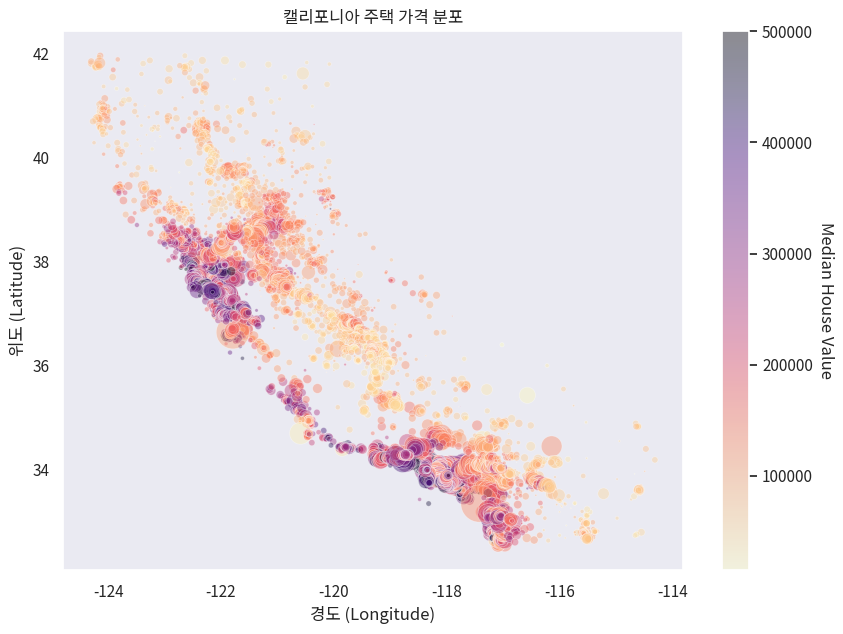

In [163]:
# 1. 위도(Latitude)와 경도(Longitude)를 활용한 지리적 시각화 수행
# 2. 산점도(경도 X 위도, 점의 색상 = median_house_value)를 그려 주택 가격의 지리적 불평등 관찰
# df_cleaned를 사용하여 색이 주택 가격, 크기가 인구 수에 비례하도록 산점도 작성
# df_cleaned_log는 로그 변환이 되어있기 때문에 산점도에서는 df_cleaned를 사용
# df_cleaned_log는 이후 분석에서 사용될 데이터 프레임
plt.figure(figsize=(10, 7))

scatter = plt.scatter(data=df_cleaned, x='longitude', y='latitude',
                      alpha=0.4, 
                      s=df_cleaned['population']/50,   
                      c=df_cleaned['median_house_value'], 
                      cmap='magma_r',edgecolors='w', linewidth=0.5)

cbar = plt.colorbar(scatter)
cbar.set_label('Median House Value', rotation=270, labelpad=15)

plt.xlabel('경도 (Longitude)')
plt.ylabel('위도 (Latitude)')
plt.title('캘리포니아 주택 가격 분포')
plt.show()

- 3. 어느 지역이 비싼가?, 가격 차이가 얼마나 뚜렷한가? 를 데이터 기반으로 설명
    - 색이 보라색으로 진하면서 원이 큰 곳 = 사람이 많고 집 값이 비싼 구역
    - 지도와 비교해 보았을 때 샌프란시스코와 로스앤젤레스에 해당
    - 주 도심지가 인구도 많고 집 값이 높게 형성되어 있는 것을 알 수 있음.
- 4. 위도/경도가 개별 변수보다 지역 표상(Proxy,대리자)이라는 점을 인식하고, 이것이 회귀에 주는 의미를 논의
    - 위도와 경도가 개별 변수보다 지역 표상이다 = 위도와 경도 자체의 데이터가 숫자 데이터가 아닌, 나타내는 지역의 이름(샌프란시스코, 로스앤젤리스)을 나타낸다는 것을 알아야 한다.
- 회귀 분석을 진행할 때 유의해야하는 이유
    - 선형 회귀는 숫자가 커지면 가격도 그만큼 변한다라고 생각하는데, 위도가 높아진다고 가격이 높아지는 것이 아니기 때문에 우리는 위도와 경도 데이터를 지역적 특성으로 고려하고 진행해야함
    - 정리하면, 위도와 경도는 입지를 나타내는 데이터이며 해당 변수는 단순 선형 관계를 갖지 않는다는 것을 알고 이런 정보들을 통해 파생변수를 이끌어 낼 줄 알아야 함.
        - 지역별로 집값의 차이가 존재할 것이라 생각 -> 군집을 묶는 파생변수 CLUSTER_ID을 명목형 변수로 취급하여 분석에 넣기

In [164]:
df_cleaned_log['ocean_proximity'].value_counts()

ocean_proximity
<1H OCEAN     8331
INLAND        6344
NEAR OCEAN    2328
NEAR BAY      1567
ISLAND           2
Name: count, dtype: int64

In [165]:
# 명목형 변수들 더미변수화 진행 (ocean_proximity, CLUSTER_ID)
df_final=df_cleaned_log.copy()
df_final=df_final[df_final['ocean_proximity']!="ISLAND"].copy()
df_final=pd.get_dummies(df_final, columns=['ocean_proximity','CLUSTER_ID'], drop_first=True,dtype=int)
df_final.head()
df_final.info()


<class 'pandas.core.frame.DataFrame'>
Index: 18570 entries, 0 to 20639
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   longitude                   18570 non-null  float64
 1   latitude                    18570 non-null  float64
 2   housing_median_age          18570 non-null  int64  
 3   total_rooms                 18570 non-null  float64
 4   total_bedrooms              18570 non-null  float64
 5   population                  18570 non-null  float64
 6   households                  18570 non-null  float64
 7   median_income               18570 non-null  float64
 8   median_house_value          18570 non-null  float64
 9   ocean_proximity_INLAND      18570 non-null  int64  
 10  ocean_proximity_NEAR BAY    18570 non-null  int64  
 11  ocean_proximity_NEAR OCEAN  18570 non-null  int64  
 12  CLUSTER_ID_1                18570 non-null  int64  
 13  CLUSTER_ID_2                18570 no

- 분석 시작시 들어가는 데이터 목록(*는 로그가 적용되어있는 변수, **는 분석을 위해 생성된 파생 변수)
- longitude, latitude, housing_median_age, *total_rooms, *total_bedrooms, *population, *households, *median_income, *median_house_value, ocean_proximity(명목형 3개(drop=first), **CLUSTER_ID(5개))


### 미션 5. 소득은 정말로 집값을 결정할까?
- 1. median_income(중위 가구 소득)에 따라 median_house_value가 다른지 시각화하고, 선형성과 강도를 평가함
- 2. 산점도와 함께 회귀선을 그려 관계의 형태를 관찰
- 3. 상관계수(Pearson)를 계산하고 정말로 소득이 집값의 주 결정 요인인가?를 비판적으로 생각
- 4. 소득 수준에 따른 주택가격 불평등 문제를 해석 관점에서 논의

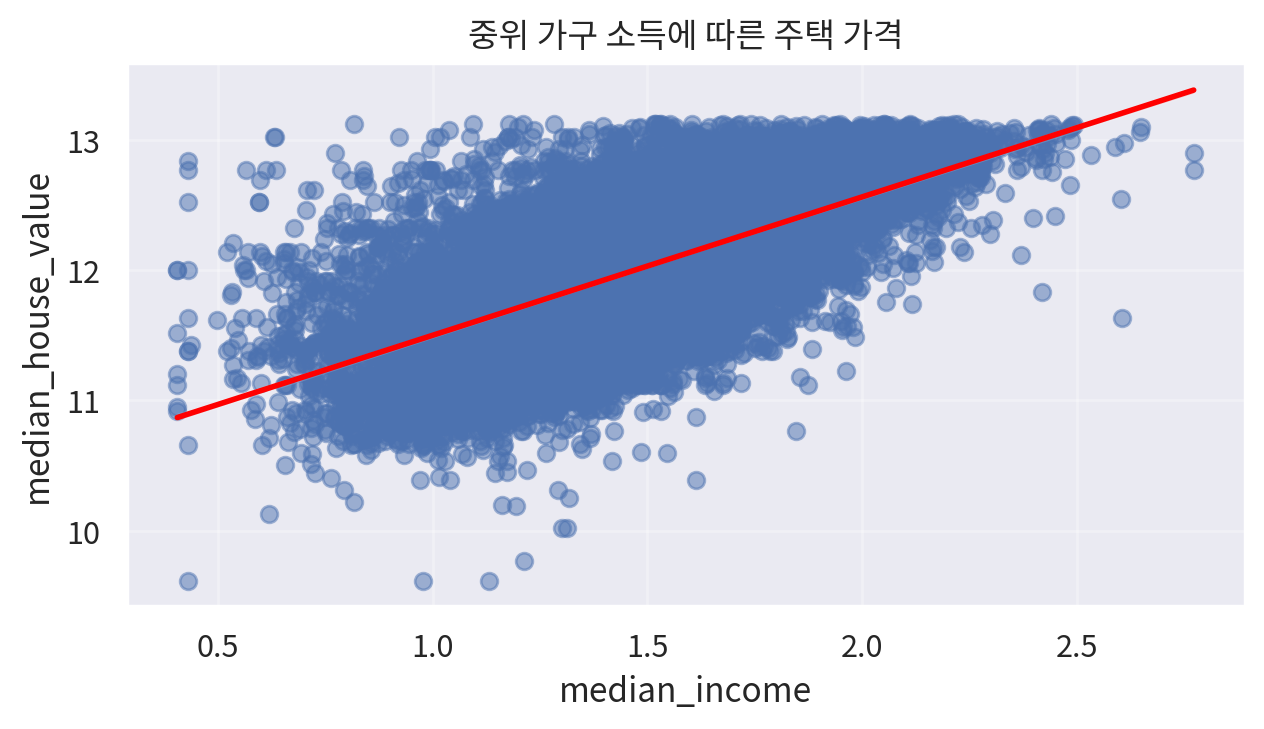

In [166]:
width_px = 1280
height_px = 720
rows = 1
cols = 1
figsize = (width_px / my_dpi, height_px / my_dpi)
fig, ax = plt.subplots(rows, cols, figsize=figsize, dpi=my_dpi)

sb.regplot(data=df_final, x='median_income', y='median_house_value',
           scatter_kws={'alpha':0.5},
           line_kws={'color':'red', 'linewidth':2})
plt.title('중위 가구 소득에 따른 주택 가격')
ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()
plt.close()

1. median_income(중위 가구 소득)에 따라 median_house_value가 다른지 시각화하고, 선형성과 강도를 평가함
2. 산점도와 함께 회귀선을 그려 관계의 형태를 관찰
- 회귀선이 우상향을 하고 있음
    - 이는 소득이 높을수록 집값도 비싸진다라는 사실을 알 수 있음
    - 데이터 점들이 회귀선 주변에 몰려있어 변수의 설명력이 올라감을 알려줌
    
- 분포 특징
    - 소득이 적은 구간(0.5~1.0)에서 주택 가격의 분산이 크다
        - 같은 소득 수준에서도 주택 가격 차이가 크다는 것을 의미함
    - 소득이 높아질수록 분산이 줄어듦
        - 이는 상한선 데이터들을 제거해서 나타나는 현상으로 추정
- median_income으로는 모든 변동을 설명하기엔 분포가 다양함

In [167]:
x = df_final['median_income']
y = df_final['median_house_value']

X = sm.add_constant(x)
model = sm.OLS(y, X).fit()
reset = linear_reset(model, power=2, use_f=True)

#선형성 적합 여부(True=적합, False=부적합)
linearity_ok = reset.pvalue > 0.05
print(f"Ramsey RESET Test : {'선형성 적합' if linearity_ok else '선형성 위반'} (p-value: {reset.pvalue:.4f})")


Ramsey RESET Test : 선형성 위반 (p-value: 0.0000)


- 3. 상관계수(Pearson)를 계산하고 정말로 소득이 집값의 주 결정 요인인가?를 비판적으로 생각
- 4. 소득 수준에 따른 주택가격 불평등 문제를 해석 관점에서 논의

In [168]:
import pandas as pd
data = df_final[['median_income','median_house_value']]
results = {}

for col in data.columns:
    temp = data[col].dropna()

    #왜도 계산
    skew_original = temp.skew()

    # Z-scoore 기반 이상치 탐지 (|z| > 3)
    z_scores = zscore(temp)
    outlier_count = int(np.sum(np.abs(z_scores) > 3))

    #로그 변환 후 왜도 계산(음수 대비 + 1)
    data_log = np.log1p(temp - temp.min() + 1)
    skew_log = data_log.skew()

    #로그 변환 필요 여부 판단
    need_log = (abs(skew_original) > 1) and (abs(skew_log) < abs(skew_original))

    results[col] = {
        'original_skew': skew_original,
        'log_skew': skew_log,
        'outliers(|z| > 3)': outlier_count,
        'log_recommend': need_log
    }

results_df = pd.DataFrame(results).T
display(results_df)

# 이상치 점검 결과
outlier_flag = len(results_df[results_df['outliers(|z| > 3)'] >0])>0
if outlier_flag:
    print("이상치가 발견되어 스피어만 상관계수 사용")
else:
    print("이상치가 발견되지 않아 피어슨 상관계수 사용")

,original_skew,log_skew,outliers(|z| > 3),log_recommend
median_income,-0.03522,-0.330724,33,False
median_house_value,-0.280329,-0.595147,18,False


이상치가 발견되어 스피어만 상관계수 사용


In [169]:
spearman_r, spearman_p = spearmanr(df_final['median_income'], df_final['median_house_value'])
"staticstic: {0:.3f}, p-value: {1:.3f}, {2}가설 채택".format(spearman_r, spearman_p, "대립" if spearman_p <= 0.05 else "귀무")

'staticstic: 0.663, p-value: 0.000, 대립가설 채택'

- 귀무가설 : 소득은 집값의 주결정요인이 아니다.
- 대립가설 : 소득은 집값의 주결정요인이다.
    - 대립가설 채택
- 소득 수준에 따른 주택가격 불평등 문제를 해석 관점에서 논의하세요
    - 소득이 높지 않은 가구의 주택 가격이 비싼 이유에 대해 알아볼 필요가 있음.
    - 소득이 오를수록 주택 가격도 비싸지는 것으로 보아 주 요인이라고는 볼 수 있음.
    - 저소득 구간에서 고가의 주택이 몇몇 보이지만 대부분 저가의 주택으로 구성됨
        - 이는 선택할 수 있는 주택 가격의 범위가 제한적이라고 볼 수 있음.
    - 고소득 구간으로 갈 수록 주거 선택지가 많아짐
        - 양극화가 일어남
    - 같은 소득이지만 주택 가격의 차이가 많이 남
        - 소득 수준은 주택 가격의 주된 요인이라고 할 수 있지만, 다른 요인의 유무가 주택 가격 형성에 기여를 하고 있다는 것을 알 수 있음.

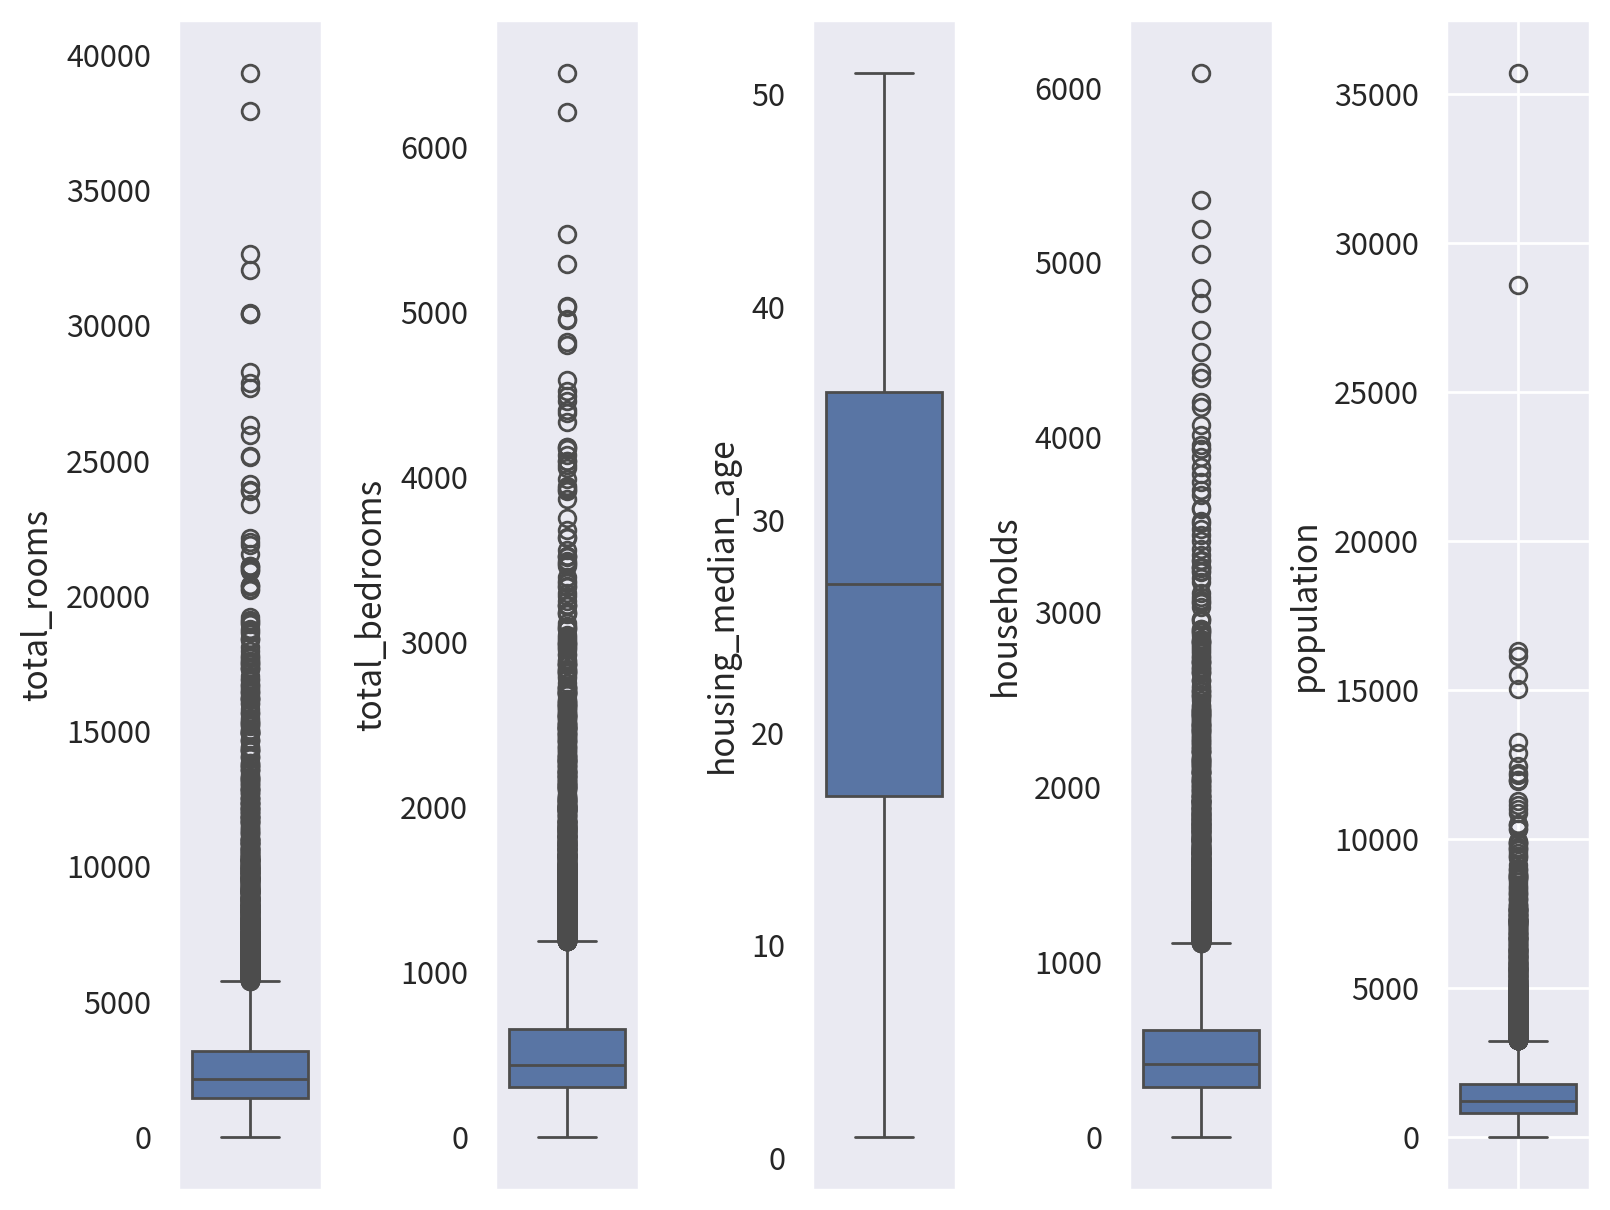

In [170]:
# 주요 변수의 이상치를 확인하기 위해서 최종 데이터 프레임(로그 적용)이 아닌 df_cleaned를 사용
# 1) 그래프 초기화 (캔버스(fig)와 도화지(ax) 준비하기)
width_px = 1600             #그래프 가로 크기
height_px = 1200             #그래프 세로 크기
rows = 1                    #도화지의 행 수
cols = 5                    #도화지의 열 수
figsize = (width_px / my_dpi, height_px / my_dpi)
fig, ax = plt.subplots(rows, cols, figsize = figsize, dpi = my_dpi)

# 2) 그래프 그리기 -> seaborn 사용
sb.boxplot(data=df_cleaned['total_rooms'],orient='v',ax=ax[0])
sb.boxplot(data=df_cleaned['total_bedrooms'],orient='v',ax=ax[1])
sb.boxplot(data=df_cleaned['housing_median_age'],orient='v',ax=ax[2])
sb.boxplot(data=df_cleaned['households'],orient='v',ax=ax[3])
sb.boxplot(data=df_cleaned['population'],orient='v',ax=ax[4])
# 3) 그래프 꾸미기 -> 도화지(ax)에 직접 적용
plt.grid(True)

# 4) 출력
plt.tight_layout()                      #여백 제거
# plt.savefig("myplot.png", dpi=my_dpi)   #생략 가능
plt.show()                              #그래프 화면 출력
plt.close()                             #그래프 작업 종료

- 데이터의 분포가 극단적이라 로그 변환을 했었음
- total_rooms는 0~5777.875 | total_bedrooms : 0 ~ 1186.0
- population : 0 ~ 3236.0 | households : 0 ~ 1109.0

- housing_median_age : 0 ~ 64.5 

- 상식선으로 총 방 개수가 4만개면 가구수가 6000개 있는 지역이라 했을 때 6000개 모두 방이 7개 가량 있다는 뜻
    - kaggle 데이터 셋인 California housing의 AveRooms를 참고하면 평균 방 수가 7개 이상인 데이터 건수가 꽤 되는 것 같아서 현실성 있다고 판단.
    - 4~5개가 평균인 듯 하며, 안정범위인 5682.5는 저소득 구간의 주택에 방 개수로 측정 된 것.
    - 고가의 주택 방 개수가 많기 때문에 이상치가 많이 찍힘
    - 이는 빈부격차로 인한 데이터 분포의 비대칭성이 일어난 것.
    - 이상치로 여기지 않고 충분히 있을 수 있는 조건이라고 생각하고 별도의 전처리 X


In [171]:
# 데이터의 정상 범위 출력하기
data_columns = ['total_rooms', 'total_bedrooms', 'housing_median_age', 'households', 'population']
Q1 = df_cleaned[data_columns].quantile(0.25)
Q3 = df_cleaned[data_columns].quantile(0.75)
IQR = Q3 - Q1

for i in data_columns:
    # lower_bound가 음수가 될 수 있으므로 음수면 0으로 처리
    lower_bound = max(0, Q1[i] - 1.5 * IQR[i])  #max함수로 0과 비교했을 때 0이 더 크면 0이 나옴
    upper_bound = Q3[i] + 1.5 * IQR[i]
    print(f"{i}의 정상 범위: {lower_bound} ~ {upper_bound}")

total_rooms의 정상 범위: 0 ~ 5777.875
total_bedrooms의 정상 범위: 0 ~ 1186.0
housing_median_age의 정상 범위: 0 ~ 64.5
households의 정상 범위: 0 ~ 1109.0
population의 정상 범위: 0 ~ 3236.0


### 미션 7. 소득과 다른 특성은 독립적일까?
- 1. 주요 연속형 변수 간 상관행렬(median_income, housing_median_age, total_rooms, total_bedrooms, population, households,위도,경도)을 계산
- 2. 상관행렬을 히트맵으로 시각화하고, Variance Inflation Factor(VIF)로 다중공선성을 점검
- 3. 높은 상관이 보이는 변수 쌍(예: total_rooms vs total_bedrooms)에 대해, 이것이 모델 설계에 주는 함의를 논의
- 4. 공선성 완화 전략을 고민하세요 : 변수 제거, 결합지표 설계 등 "해석 우선" 관점에서 선택

In [172]:
df_final_conti=df_final[['total_rooms', 'total_bedrooms', 'housing_median_age', 'households', 'population','median_income','median_house_value']]
skew_outlier={}
for col in df_final_conti.columns:
    temp = df_final_conti[col].dropna()
    skew_original = temp.skew()
    z_scores = zscore(temp)
    outlier_count = int(np.sum(np.abs(z_scores) > 3))

    data_log = np.log1p(temp - temp.min() + 1)
    skew_log = data_log.skew()

    skew_outlier[col]= {
        'original_skew': skew_original,
        # 'log_skew': skew_log,
        # df_final이 이미 로그 변환된 데이터 프레임이므로 log_skew는 불필요
        'outliers(|z| > 3)': outlier_count
    }
skew_outlier_df=DataFrame(skew_outlier).T
skew_outlier_df

,original_skew,outliers(|z| > 3)
total_rooms,-0.964825,257.0
total_bedrooms,-0.900186,264.0
housing_median_age,-0.057044,0.0
households,-0.974646,268.0
population,-1.007169,267.0
median_income,-0.035220,33.0
median_house_value,-0.280329,18.0


In [173]:
rows = []

for a, b in combinations(df_final_conti.columns,2):
    x = df_final_conti[a]
    y = df_final_conti[b]

    # [1] 선형성 확인(Ramsey RESET)
    X = sm.add_constant(x)
    model = sm.OLS(y, X).fit()
    reset = linear_reset(model, power=2, use_f=True)
    linearity_ok = reset.pvalue>0.05

    # [2] 이상치 존재 여부(|z| > 3 기준)
    a_flag = skew_outlier_df.loc[a, 'outliers(|z| > 3)'] >0
    b_flag = skew_outlier_df.loc[b, 'outliers(|z| > 3)'] >0
    outlier_flag = a_flag or b_flag

    # [3] 상관계수 선택 및 계산
    if linearity_ok and not outlier_flag:
        chosen = 'pearson'
        corr, pval = pearsonr(x,y)
    else:
        chosen = 'spearman'
        corr,pval = spearmanr(x,y)

    # [4] 유의성 판단(p <= 0.05)
    significant = pval <= 0.05

    # [5] 상관 강도 계산
    abs_r = abs(corr)
    if abs_r >= 0.80:
        strength = 'Very strong'
    elif abs_r >= 0.60:
        strength = 'Strong'
    elif abs_r >= 0.40:
        strength = 'Medium'
    elif abs_r >= 0.20:
        strength = 'Weak'
    else:
        strength = 'Very weak'
    
    # [6] 행 추가
    rows.append({
        "var_a": a,
        "var_b": b,
        "linearity": linearity_ok,
        "outlier_flag": outlier_flag,
        "chosen": chosen,
        "corr": corr,
        "pval": pval,
        "significant": significant,
        "strength": strength
    })

summary_df = DataFrame(rows)
summary_df

,var_a,var_b,linearity,outlier_flag,chosen,corr,pval,significant,strength
0,total_rooms,total_bedrooms,False,True,spearman,0.915731,0.000000e+00,True,Very strong
1,total_rooms,housing_median_age,False,True,spearman,-0.372687,0.000000e+00,True,Weak
2,total_rooms,households,False,True,spearman,0.911635,0.000000e+00,True,Very strong
3,total_rooms,population,False,True,spearman,0.821463,0.000000e+00,True,Very strong
4,total_rooms,median_income,False,True,spearman,0.268851,6.799866e-305,True,Weak
5,total_rooms,median_house_value,False,True,spearman,0.211150,3.540763e-186,True,Weak
6,total_bedrooms,housing_median_age,False,True,spearman,-0.312473,0.000000e+00,True,Weak
7,total_bedrooms,households,False,True,spearman,0.968764,0.000000e+00,True,Very strong
8,total_bedrooms,population,False,True,spearman,0.867436,0.000000e+00,True,Very strong
9,total_bedrooms,median_income,True,True,spearman,0.005694,4.378242e-01,False,Very weak


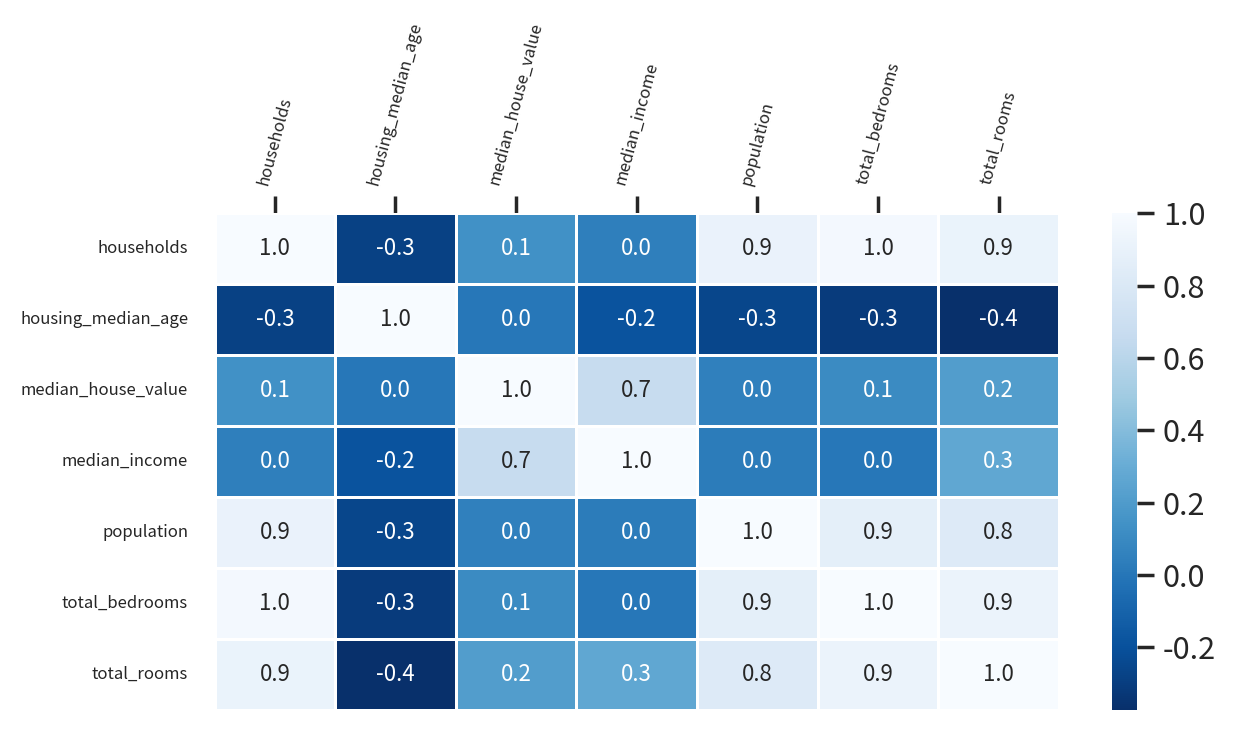

In [174]:
# 1) 등장하는 모든 변수 목록 추출
vars = sorted(set(summary_df['var_a']).union(summary_df['var_b']))

# 2) 빈 상관행렬 생성 (NaN으로 초기화)
corr_matrix = DataFrame(np.nan, index=vars, columns=vars)

# 3) summary_df 내용을 반영하여 대칭 행렬 채우기
for _, row in summary_df.iterrows():
    a, b, r = row['var_a'], row['var_b'], row['corr']
    corr_matrix.loc[a, b] = r
    corr_matrix.loc[b, a] = r # 대칭

# 4) 대각선 (diagonal)을 1로 설정
np.fill_diagonal(corr_matrix.values, 1)

# corr_matrix
width_px = 1280
height_px = 720
rows = 1
cols = 1
figsize = (width_px / my_dpi, height_px / my_dpi)
fig,ax = plt.subplots(rows, cols, figsize=figsize, dpi=my_dpi)

sb.heatmap(data=corr_matrix, annot=True, fmt='0.1f', linewidth=0.5, cmap='Blues_r', annot_kws={'size':8})

ax.xaxis.tick_top()
ax.xaxis.set_tick_params(rotation=75, labelsize=6)
ax.yaxis.set_tick_params(labelsize=6)
plt.tight_layout()
plt.show()
plt.close()


### 미션 8. 어떤 변수가 가격과 가장 가까울까?
- 1. median_house_value와 연속형 변수들의 상관을 계산
- 2. Pearson과 Spearman을 모두 계산하고, 비교해 무엇이 더 적합한지 이유 적기
- 3. 각 변수의 관계를 물리,사회적 언어로 해석하고(예: 소득이 높을수록 비싼 주택 지역, 오래된 주택은 더 저렴), 인과성을 말할 수 있는지 비판적으로 평가

In [197]:
#median_house_value와 연속형 변수들간의 상관 계산
for col in df_final_conti.columns:
    if col == 'median_house_value':
        continue

    x = df_final_conti[col]
    y = df_final_conti['median_house_value']

    spearman_r, spearman_p = spearmanr(x,y)
    print(f"{col}와 median_house_value의 스피어만 상관계수: {spearman_r:.3f}, p-value: {spearman_p:.3f}, {'대립' if spearman_p <= 0.05 else '귀무'}가설 채택")

total_rooms와 median_house_value의 스피어만 상관계수: 0.211, p-value: 0.000, 대립가설 채택
total_bedrooms와 median_house_value의 스피어만 상관계수: 0.107, p-value: 0.000, 대립가설 채택
housing_median_age와 median_house_value의 스피어만 상관계수: 0.006, p-value: 0.392, 귀무가설 채택
households와 median_house_value의 스피어만 상관계수: 0.138, p-value: 0.000, 대립가설 채택
population와 median_house_value의 스피어만 상관계수: 0.047, p-value: 0.000, 대립가설 채택
median_income와 median_house_value의 스피어만 상관계수: 0.663, p-value: 0.000, 대립가설 채택


In [198]:
df_final2= df_final.copy()

yname = 'median_house_value'
x=df_final2.drop([yname], axis=1)
y=df_final2[yname]
x_input = sm.add_constant(x)

fit = sm.OLS(y, x_input).fit()
tbl1=fit.summary()
print(tbl1)

                            OLS Regression Results                            
Dep. Variable:     median_house_value   R-squared:                       0.713
Model:                            OLS   Adj. R-squared:                  0.713
Method:                 Least Squares   F-statistic:                     2884.
Date:                    금, 09 1 2026   Prob (F-statistic):               0.00
Time:                        12:08:27   Log-Likelihood:                -2895.0
No. Observations:               18570   AIC:                             5824.
Df Residuals:                   18553   BIC:                             5957.
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const               

In [199]:
def ols_report(tbl, data):
    """
    OLS summary(tbl)와 데이터프레임(data)을 받아 회귀계수 표(rdf),
    모델 적합도 요약(result_report), 모형 보고 문장(model_report),
    변수별 보고 리스트(variable_reports)를 반환한다.

    Parameters
    ----------
    tbl : statsmodels.iolib.summary.Summary
        sm.OLS(...).fit().summary()의 결과로 생성된 summary 객체
    data : pandas.DataFrame
    종속변수와 독립변수를 모두 포함한 데이터프레임.

    Returns
    -------
    tuple
        (회귀계수 DataFrame, 적합도 요약 문자열, 모형 보고 문자열, 변수별 보고 리스트)
    """
    #독립변수 이름(상수항 제외)
    xnames = [n for n in fit.model.exog_names if n != 'const']

    #독립변수 부분 데이터(VIF 계산용)
    indi_df = data.filter(xnames)

    #독립변수 결과를 누적
    variables = []
    for i, v in enumerate(tbl.tables[1].data):
        #한 행의 변수명 추출 후 목록에 있는지 확인
        name = v[0].strip()
        if name not in xnames:
            continue

        #VIF 계산을 위해 열 인덱스 조회
        j = list(indi_df.columns).index(name)
        vif = variance_inflation_factor(indi_df.values, j)

        #유의확률과 별표 표시 함수
        p = float(v[4].strip())
        stars = lambda p:(
            "***" if p < 0.001 else
            "**" if p < 0.01 else
            "*" if p < 0.05 else
            ""
        )

        #한 변수에 대한 보고 정보 추가
        variables.append({
            "종속변수": yname,
            "독립변수": name,
            "B": v[1].strip(),
            "표준오차": v[2].strip(),
            "Beta": float(fit.params[name]) * data[name].std() / data[yname].std(ddof=1),
            "t": "%s%s" %(v[3].strip(), stars(p)),
            "p-value": p,
            "공차" : 1/vif,
            "vif": vif
        })
    rdf = DataFrame(variables)

    #summary 표에서 적합도 정보를 key-value로 추출

    result_dict={}
    for i in [0,2]:
        for item in tbl.tables[i].data:
            n = len(item)
            for i in range(0,n,2):
                key = item[i].strip()[:-1]
                value = item[i+1].strip()
                if not key or not value:
                    continue

                result_dict[key]=value

    #적합도 보고 문자열 생성
    result_report = f"R({result_dict['R-squared']}), R^2({result_dict['Adj. R-squared']}), F({result_dict['F-statistic']}, p={result_dict['Prob (F-statistic)']}), 유의확률({result_dict['Prob (F-statistic)']}), Durbin-Watson({result_dict['Durbin-Watson']})" 

    #모형 보고 문자열 생성
    tpl = "%s에 대하여 %s로 예측하는 회귀분석을 실시한 결과, 이 회귀모형은 통계적으로 %s(F(%s,%s) = %s, p %s 0.05)."
    model_report = tpl %(
        rdf['종속변수'][0],
        ",".join(list(rdf['독립변수'])),
        "유의하다" if float(result_dict['Prob (F-statistic)']) <= 0.05 else "유의하지 않다",
        result_dict['Df Model'],
        result_dict['Df Residuals'],
        result_dict['F-statistic'],
        "<=" if float(result_dict['Prob (F-statistic)']) <= 0.05 else ">"
    )

    #변수별 보고 문장 리스트 구성
    variable_reports = []
    s = "%s의 회귀계수는 %s(p %s 0.05)로, %s에 대하여 %s 예측변인인 것으로 나타났다."

    for i in rdf.index:
        row = rdf.iloc[i]
        variable_reports.append(s %(row['독립변수'],
            row['B'],
            "<=" if float(row['p-value']) < 0.05 else ">",
            row['종속변수'],
            "유의한" if float(row['p-value']) < 0.05 else "유의하지 않은"))
    return rdf, result_report, model_report, variable_reports


In [200]:
rdf,r,m,v = ols_report(tbl1, df_final2)
display(rdf)
print(m)

,종속변수,독립변수,B,표준오차,Beta,t,p-value,공차,vif
0,median_house_value,longitude,-0.1489,0.007,-0.558645,-22.324***,0.000,0.000097,10308.808578
1,median_house_value,latitude,-0.1397,0.006,-0.568304,-25.362***,0.000,0.000116,8602.464357
2,median_house_value,housing_median_age,-0.0004,0.000,-0.009228,-2.013*,0.044,0.112225,8.910678
3,median_house_value,total_rooms,-0.0456,0.014,-0.063719,-3.240**,0.001,0.000370,2699.693382
4,median_house_value,total_bedrooms,0.2093,0.016,0.282245,12.969***,0.000,0.000447,2238.765019
5,median_house_value,population,-0.3783,0.008,-0.520969,-45.390***,0.000,0.001234,810.610354
6,median_house_value,households,0.2329,0.016,0.316447,14.856***,0.000,0.000494,2023.550705
7,median_house_value,median_income,0.8421,0.011,0.525784,78.247***,0.000,0.015948,62.705178
8,median_house_value,ocean_proximity_INLAND,-0.2409,0.008,-0.216346,-28.735***,0.000,0.240433,4.159162
9,median_house_value,ocean_proximity_NEAR BAY,-0.0997,0.010,-0.052477,-10.164***,0.000,0.531085,1.882938


median_house_value에 대하여 longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity_INLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN,CLUSTER_ID_1,CLUSTER_ID_2,CLUSTER_ID_3,CLUSTER_ID_4,CLUSTER_ID_5로 예측하는 회귀분석을 실시한 결과, 이 회귀모형은 통계적으로 유의하다(F(16,18553) = 2884., p <= 0.05).


In [203]:
df_final_3 = df_final2.drop(['longitude','latitude'], axis=1)
yname = 'median_house_value'

x=df_final_3.drop([yname], axis=1)
y=df_final_3[yname]
x_input = sm.add_constant(x)

fit = sm.OLS(y, x_input).fit()
tbl1=fit.summary()
# print(tbl1)
rdf,r,m,v = ols_report(tbl1, df_final_3)
display(rdf)
print(m)

,종속변수,독립변수,B,표준오차,Beta,t,p-value,공차,vif
0,median_house_value,housing_median_age,-8.634e-05,0.000,-0.001869,-0.400,0.689,0.136928,7.303089
1,median_house_value,total_rooms,-0.0879,0.014,-0.122965,-6.162***,0.000,0.000429,2331.362520
2,median_house_value,total_bedrooms,0.1683,0.016,0.226996,10.275***,0.000,0.000448,2231.820551
3,median_house_value,population,-0.3724,0.008,-0.512854,-43.835***,0.000,0.001395,716.899631
4,median_house_value,households,0.3123,0.016,0.424339,19.875***,0.000,0.000554,1805.705520
5,median_house_value,median_income,0.8723,0.011,0.544651,79.857***,0.000,0.016130,61.995978
6,median_house_value,ocean_proximity_INLAND,-0.3824,0.007,-0.343398,-57.120***,0.000,0.298233,3.353079
7,median_house_value,ocean_proximity_NEAR BAY,-0.1257,0.010,-0.066183,-12.669***,0.000,0.541459,1.846862
8,median_house_value,ocean_proximity_NEAR OCEAN,0.1127,0.008,0.070641,14.846***,0.000,0.628917,1.590036
9,median_house_value,CLUSTER_ID_1,0.1604,0.013,0.095502,11.936***,0.000,0.240997,4.149429


median_house_value에 대하여 housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity_INLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN,CLUSTER_ID_1,CLUSTER_ID_2,CLUSTER_ID_3,CLUSTER_ID_4,CLUSTER_ID_5로 예측하는 회귀분석을 실시한 결과, 이 회귀모형은 통계적으로 유의하다(F(14,18555) = 3107., p <= 0.05).


In [206]:
df_final_4 = df_final_3.drop(['total_rooms'], axis=1)
yname = 'median_house_value'

x=df_final_4.drop([yname], axis=1)
y=df_final_4[yname]
x_input = sm.add_constant(x)

fit = sm.OLS(y, x_input).fit()
tbl1=fit.summary()
# print(tbl1)
rdf,r,m,v = ols_report(tbl1, df_final_4)
display(rdf)
print(m)

,종속변수,독립변수,B,표준오차,Beta,t,p-value,공차,vif
0,median_house_value,housing_median_age,-0.0002,0.000,-0.003480,-0.746,0.456,0.145604,6.867948
1,median_house_value,total_bedrooms,0.1028,0.012,0.138592,8.241***,0.000,0.000835,1197.121112
2,median_house_value,population,-0.3778,0.008,-0.520226,-44.655***,0.000,0.001491,670.896187
3,median_house_value,households,0.2960,0.016,0.402196,19.092***,0.000,0.000556,1798.845335
4,median_house_value,median_income,0.8216,0.007,0.512991,114.243***,0.000,0.046043,21.718799
5,median_house_value,ocean_proximity_INLAND,-0.3938,0.006,-0.353642,-61.149***,0.000,0.338950,2.950285
6,median_house_value,ocean_proximity_NEAR BAY,-0.1278,0.010,-0.067290,-12.875***,0.000,0.542908,1.841933
7,median_house_value,ocean_proximity_NEAR OCEAN,0.1150,0.008,0.072108,15.158***,0.000,0.629061,1.589672
8,median_house_value,CLUSTER_ID_1,0.1674,0.013,0.099664,12.488***,0.000,0.241034,4.148795
9,median_house_value,CLUSTER_ID_2,0.1151,0.013,0.062638,8.593***,0.000,0.292105,3.423421


median_house_value에 대하여 housing_median_age,total_bedrooms,population,households,median_income,ocean_proximity_INLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN,CLUSTER_ID_1,CLUSTER_ID_2,CLUSTER_ID_3,CLUSTER_ID_4,CLUSTER_ID_5로 예측하는 회귀분석을 실시한 결과, 이 회귀모형은 통계적으로 유의하다(F(13,18556) = 3336., p <= 0.05).


In [208]:
df_final_5 = df_final_4.drop(['households'], axis=1)
yname = 'median_house_value'

x=df_final_5.drop([yname], axis=1)
y=df_final_5[yname]
x_input = sm.add_constant(x)

fit = sm.OLS(y, x_input).fit()
tbl1=fit.summary()
# print(tbl1)
rdf,r,m,v = ols_report(tbl1, df_final_5)
display(rdf)
print(m)

,종속변수,독립변수,B,표준오차,Beta,t,p-value,공차,vif
0,median_house_value,housing_median_age,7.582e-05,0.000,0.001641,0.349,0.727,0.146783,6.812771
1,median_house_value,total_bedrooms,0.3019,0.007,0.407094,43.721***,0.000,0.002586,386.730955
2,median_house_value,population,-0.2785,0.007,-0.383448,-41.337***,0.000,0.002213,451.953488
3,median_house_value,median_income,0.8373,0.007,0.522775,116.056***,0.000,0.046047,21.716755
4,median_house_value,ocean_proximity_INLAND,-0.4050,0.006,-0.363753,-62.553***,0.000,0.349525,2.861023
5,median_house_value,ocean_proximity_NEAR BAY,-0.1190,0.010,-0.062617,-11.879***,0.000,0.543494,1.839946
6,median_house_value,ocean_proximity_NEAR OCEAN,0.1223,0.008,0.076678,15.983***,0.000,0.629503,1.588555
7,median_house_value,CLUSTER_ID_1,0.1608,0.014,0.095757,11.887***,0.000,0.243718,4.103109
8,median_house_value,CLUSTER_ID_2,0.1151,0.014,0.062630,8.509***,0.000,0.293548,3.406603
9,median_house_value,CLUSTER_ID_3,0.3264,0.013,0.201158,24.752***,0.000,0.231886,4.312463


median_house_value에 대하여 housing_median_age,total_bedrooms,population,median_income,ocean_proximity_INLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN,CLUSTER_ID_1,CLUSTER_ID_2,CLUSTER_ID_3,CLUSTER_ID_4,CLUSTER_ID_5로 예측하는 회귀분석을 실시한 결과, 이 회귀모형은 통계적으로 유의하다(F(12,18557) = 3515., p <= 0.05).


In [215]:
df_final_6 = df_final_5.drop(['population'], axis=1)
yname = 'median_house_value'

x=df_final_6.drop([yname], axis=1)
y=df_final_6[yname]
x_input = sm.add_constant(x)

fit = sm.OLS(y, x_input).fit()
tbl1=fit.summary()
# print(tbl1)
rdf,r,m,v = ols_report(tbl1, df_final_6)
display(rdf)
print(m)

,종속변수,독립변수,B,표준오차,Beta,t,p-value,공차,vif
0,median_house_value,housing_median_age,-0.0002,0.000,-0.004589,-0.934,0.35,0.153681,6.507003
1,median_house_value,total_bedrooms,0.0484,0.003,0.065291,14.595***,0.00,0.030618,32.660561
2,median_house_value,median_income,0.8285,0.008,0.517295,109.942***,0.00,0.047648,20.987350
3,median_house_value,ocean_proximity_INLAND,-0.3918,0.007,-0.351854,-57.973***,0.00,0.350132,2.856066
4,median_house_value,ocean_proximity_NEAR BAY,-0.0901,0.010,-0.047431,-8.631***,0.00,0.545419,1.833454
5,median_house_value,ocean_proximity_NEAR OCEAN,0.1414,0.008,0.088686,17.723***,0.00,0.630452,1.586163
6,median_house_value,CLUSTER_ID_1,0.1234,0.014,0.073500,8.751***,0.00,0.250424,3.993227
7,median_house_value,CLUSTER_ID_2,0.0506,0.014,0.027537,3.604***,0.00,0.306355,3.264191
8,median_house_value,CLUSTER_ID_3,0.2915,0.014,0.179670,21.199***,0.00,0.236912,4.220985
9,median_house_value,CLUSTER_ID_4,0.3463,0.013,0.325005,26.388***,0.00,0.073087,13.682240


median_house_value에 대하여 housing_median_age,total_bedrooms,median_income,ocean_proximity_INLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN,CLUSTER_ID_1,CLUSTER_ID_2,CLUSTER_ID_3,CLUSTER_ID_4,CLUSTER_ID_5로 예측하는 회귀분석을 실시한 결과, 이 회귀모형은 통계적으로 유의하다(F(11,18558) = 3369., p <= 0.05).


In [183]:
# df_final_7 = df_final_6.drop(['latitude'], axis=1)
# yname = 'median_house_value'

# x=df_final_7.drop([yname], axis=1)
# y=df_final_7[yname]
# x_input = sm.add_constant(x)

# fit = sm.OLS(y, x_input).fit()
# tbl1=fit.summary()
# # print(tbl1)
# rdf,r,m,v = ols_report(tbl1, df_final_7)
# display(rdf)
# print(m)

,종속변수,독립변수,B,표준오차,Beta,t,p-value,공차,vif
0,median_house_value,housing_median_age,-0.0002,0.000,-0.004589,-0.934,0.35,0.153681,6.507003
1,median_house_value,total_bedrooms,0.0484,0.003,0.065291,14.595***,0.00,0.030618,32.660561
2,median_house_value,median_income,0.8285,0.008,0.517295,109.942***,0.00,0.047648,20.987350
3,median_house_value,ocean_proximity_INLAND,-0.3918,0.007,-0.351854,-57.973***,0.00,0.350132,2.856066
4,median_house_value,ocean_proximity_NEAR BAY,-0.0901,0.010,-0.047431,-8.631***,0.00,0.545419,1.833454
5,median_house_value,ocean_proximity_NEAR OCEAN,0.1414,0.008,0.088686,17.723***,0.00,0.630452,1.586163
6,median_house_value,CLUSTER_ID_1,0.1234,0.014,0.073500,8.751***,0.00,0.250424,3.993227
7,median_house_value,CLUSTER_ID_2,0.0506,0.014,0.027537,3.604***,0.00,0.306355,3.264191
8,median_house_value,CLUSTER_ID_3,0.2915,0.014,0.179670,21.199***,0.00,0.236912,4.220985
9,median_house_value,CLUSTER_ID_4,0.3463,0.013,0.325005,26.388***,0.00,0.073087,13.682240


median_house_value에 대하여 housing_median_age,total_bedrooms,median_income,ocean_proximity_INLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN,CLUSTER_ID_1,CLUSTER_ID_2,CLUSTER_ID_3,CLUSTER_ID_4,CLUSTER_ID_5로 예측하는 회귀분석을 실시한 결과, 이 회귀모형은 통계적으로 유의하다(F(11,18558) = 3369., p <= 0.05).


In [184]:
# df_final_8 = df_final_7.drop(['total_bedrooms'], axis=1)
# yname = 'median_house_value'

# x=df_final_8.drop([yname], axis=1)
# y=df_final_8[yname]
# x_input = sm.add_constant(x)

# fit = sm.OLS(y, x_input).fit()
# tbl1=fit.summary()
# # print(tbl1)
# rdf,r,m,v = ols_report(tbl1, df_final_8)
# display(rdf)
# print(m)

,종속변수,독립변수,B,표준오차,Beta,t,p-value,공차,vif
0,median_house_value,housing_median_age,-0.0012,0.000,-0.026357,-5.598***,0.0,0.158462,6.310670
1,median_house_value,median_income,0.8202,0.008,0.512128,108.535***,0.0,0.063021,15.867852
2,median_house_value,ocean_proximity_INLAND,-0.3966,0.007,-0.356149,-58.416***,0.0,0.381870,2.618691
3,median_house_value,ocean_proximity_NEAR BAY,-0.0875,0.010,-0.046038,-8.332***,0.0,0.547149,1.827657
4,median_house_value,ocean_proximity_NEAR OCEAN,0.1444,0.008,0.090548,17.998***,0.0,0.639327,1.564144
5,median_house_value,CLUSTER_ID_1,0.1342,0.014,0.079932,9.475***,0.0,0.328592,3.043284
6,median_house_value,CLUSTER_ID_2,0.0570,0.014,0.031015,4.038***,0.0,0.375556,2.662722
7,median_house_value,CLUSTER_ID_3,0.2981,0.014,0.183740,21.568***,0.0,0.280439,3.565834
8,median_house_value,CLUSTER_ID_4,0.3618,0.013,0.339539,27.502***,0.0,0.097711,10.234278
9,median_house_value,CLUSTER_ID_5,0.4175,0.014,0.320770,29.303***,0.0,0.155825,6.417462


median_house_value에 대하여 housing_median_age,median_income,ocean_proximity_INLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN,CLUSTER_ID_1,CLUSTER_ID_2,CLUSTER_ID_3,CLUSTER_ID_4,CLUSTER_ID_5로 예측하는 회귀분석을 실시한 결과, 이 회귀모형은 통계적으로 유의하다(F(10,18559) = 3643., p <= 0.05).


In [185]:
print(tbl1)

                            OLS Regression Results                            
Dep. Variable:     median_house_value   R-squared:                       0.663
Model:                            OLS   Adj. R-squared:                  0.662
Method:                 Least Squares   F-statistic:                     3643.
Date:                    금, 09 1 2026   Prob (F-statistic):               0.00
Time:                        12:02:53   Log-Likelihood:                -4407.3
No. Observations:               18570   AIC:                             8837.
Df Residuals:                   18559   BIC:                             8923.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const               

In [186]:
# #median_house_value와 연속형 변수들간의 상관 계산
# for col in df_final_8.columns:
#     if col == 'median_house_value':
#         continue

#     x = df_final_8[col]
#     y = df_final_8['median_house_value']

#     spearman_r, spearman_p = spearmanr(x,y)
#     print(f"{col}와 median_house_value의 스피어만 상관계수: {spearman_r:.3f}, p-value: {spearman_p:.3f}, {'대립' if spearman_p <= 0.05 else '귀무'}가설 채택")

housing_median_age와 median_house_value의 스피어만 상관계수: 0.006, p-value: 0.392, 귀무가설 채택
median_income와 median_house_value의 스피어만 상관계수: 0.663, p-value: 0.000, 대립가설 채택
ocean_proximity_INLAND와 median_house_value의 스피어만 상관계수: -0.564, p-value: 0.000, 대립가설 채택
ocean_proximity_NEAR BAY와 median_house_value의 스피어만 상관계수: 0.112, p-value: 0.000, 대립가설 채택
ocean_proximity_NEAR OCEAN와 median_house_value의 스피어만 상관계수: 0.145, p-value: 0.000, 대립가설 채택
CLUSTER_ID_1와 median_house_value의 스피어만 상관계수: -0.073, p-value: 0.000, 대립가설 채택
CLUSTER_ID_2와 median_house_value의 스피어만 상관계수: -0.279, p-value: 0.000, 대립가설 채택
CLUSTER_ID_3와 median_house_value의 스피어만 상관계수: -0.270, p-value: 0.000, 대립가설 채택
CLUSTER_ID_4와 median_house_value의 스피어만 상관계수: 0.233, p-value: 0.000, 대립가설 채택
CLUSTER_ID_5와 median_house_value의 스피어만 상관계수: 0.290, p-value: 0.000, 대립가설 채택


In [187]:
# df_final_9 = df_final_8.drop('housing_median_age', axis=1)
# yname = 'median_house_value'
# x=df_final_9.drop([yname], axis=1)
# y=df_final_9[yname]
# x_input = sm.add_constant(x)
# fit = sm.OLS(y, x_input).fit()
# tbl1=fit.summary()
# rdf,r,m,v = ols_report(tbl1, df_final_9)
# display(rdf)
# print(m)

,종속변수,독립변수,B,표준오차,Beta,t,p-value,공차,vif
0,median_house_value,median_income,0.8322,0.007,0.519610,114.728***,0.0,0.063027,15.866296
1,median_house_value,ocean_proximity_INLAND,-0.3909,0.007,-0.351040,-58.187***,0.0,0.382480,2.614514
2,median_house_value,ocean_proximity_NEAR BAY,-0.0939,0.010,-0.049411,-8.988***,0.0,0.560332,1.784657
3,median_house_value,ocean_proximity_NEAR OCEAN,0.1405,0.008,0.088102,17.564***,0.0,0.657700,1.520451
4,median_house_value,CLUSTER_ID_1,0.1378,0.014,0.082042,9.727***,0.0,0.357930,2.793845
5,median_house_value,CLUSTER_ID_2,0.0540,0.014,0.029380,3.825***,0.0,0.428687,2.332702
6,median_house_value,CLUSTER_ID_3,0.2932,0.014,0.180714,21.238***,0.0,0.319981,3.125186
7,median_house_value,CLUSTER_ID_4,0.3536,0.013,0.331856,27.026***,0.0,0.129853,7.701019
8,median_house_value,CLUSTER_ID_5,0.4125,0.014,0.316920,28.985***,0.0,0.179475,5.571811


median_house_value에 대하여 median_income,ocean_proximity_INLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN,CLUSTER_ID_1,CLUSTER_ID_2,CLUSTER_ID_3,CLUSTER_ID_4,CLUSTER_ID_5로 예측하는 회귀분석을 실시한 결과, 이 회귀모형은 통계적으로 유의하다(F(9,18560) = 4038., p <= 0.05).


In [188]:
print(tbl1)

                            OLS Regression Results                            
Dep. Variable:     median_house_value   R-squared:                       0.662
Model:                            OLS   Adj. R-squared:                  0.662
Method:                 Least Squares   F-statistic:                     4038.
Date:                    금, 09 1 2026   Prob (F-statistic):               0.00
Time:                        12:02:53   Log-Likelihood:                -4422.9
No. Observations:               18570   AIC:                             8866.
Df Residuals:                   18560   BIC:                             8944.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const               

### 미션 10. 주택 가격을 설명하는 회귀모형 설계
- 1. median_house_value(또는 변환값)를 종속변수로 하는 다중선형회귀(OLS)를 설계
- 2. 변수 선택,스케일/변환 이유를 설명하고 싶어서 관점으로 글로 남김
- 3. statsmodels의 OLS를 사용하여 회귀모형을 적합하고, 모형 요약(summary)을 통해 계수, p-value, 신뢰구간을 확인
- 4. 적합도 지표를 확인: R^2/Adj. R^2, RMSE/MAE를 계산하고 1990년 주택 가격 맥락에서 해석한다.
- 5. 공선성은 상관행렬,VIF로 점검하고, 필요 시 변수 제거,결합지표로 완화

In [216]:
reset_res = linear_reset(fit, power=2, use_f=True)
print(f"RESET F-statistic: {reset_res.fvalue:.4f}")
print(f"p-value: {reset_res.pvalue:.4f}")

if reset_res.pvalue < 0.05:
    print("선형성/기능형 위배 가능성이 있음 (5% 유의수준)")
else:
    print("선형성 가정 위배 근거 없음 (5% 유의수준)")

RESET F-statistic: 3.4506
p-value: 0.0632
선형성 가정 위배 근거 없음 (5% 유의수준)


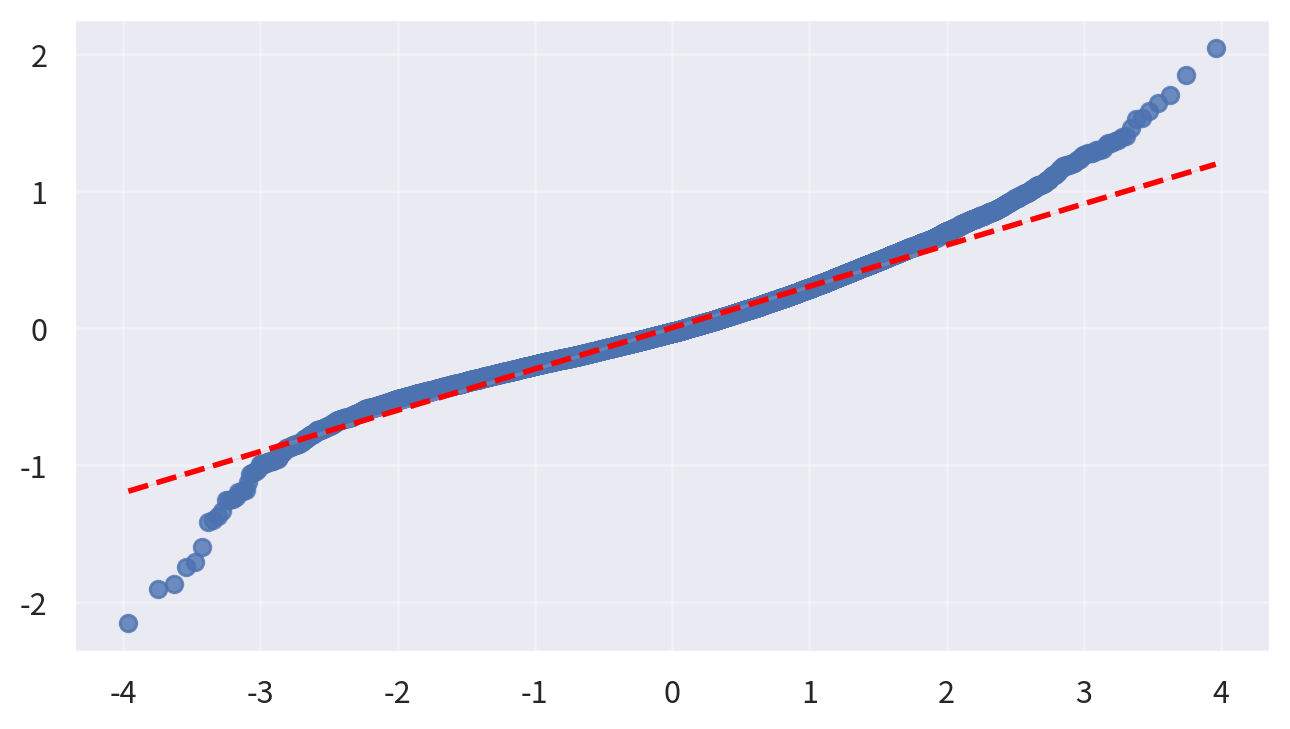

In [217]:
(x, y), _ = probplot(fit.resid)

width_px = 1280
height_px = 720
rows=1
cols=1
figsize = (width_px / my_dpi, height_px / my_dpi)
fig, ax = plt.subplots(rows, cols, dpi=my_dpi, figsize=figsize)

sb.regplot(x=x, y=y, line_kws={'color':'red',
                               'linestyle':'--',
                               'linewidth':2
                               })

ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()
plt.close()

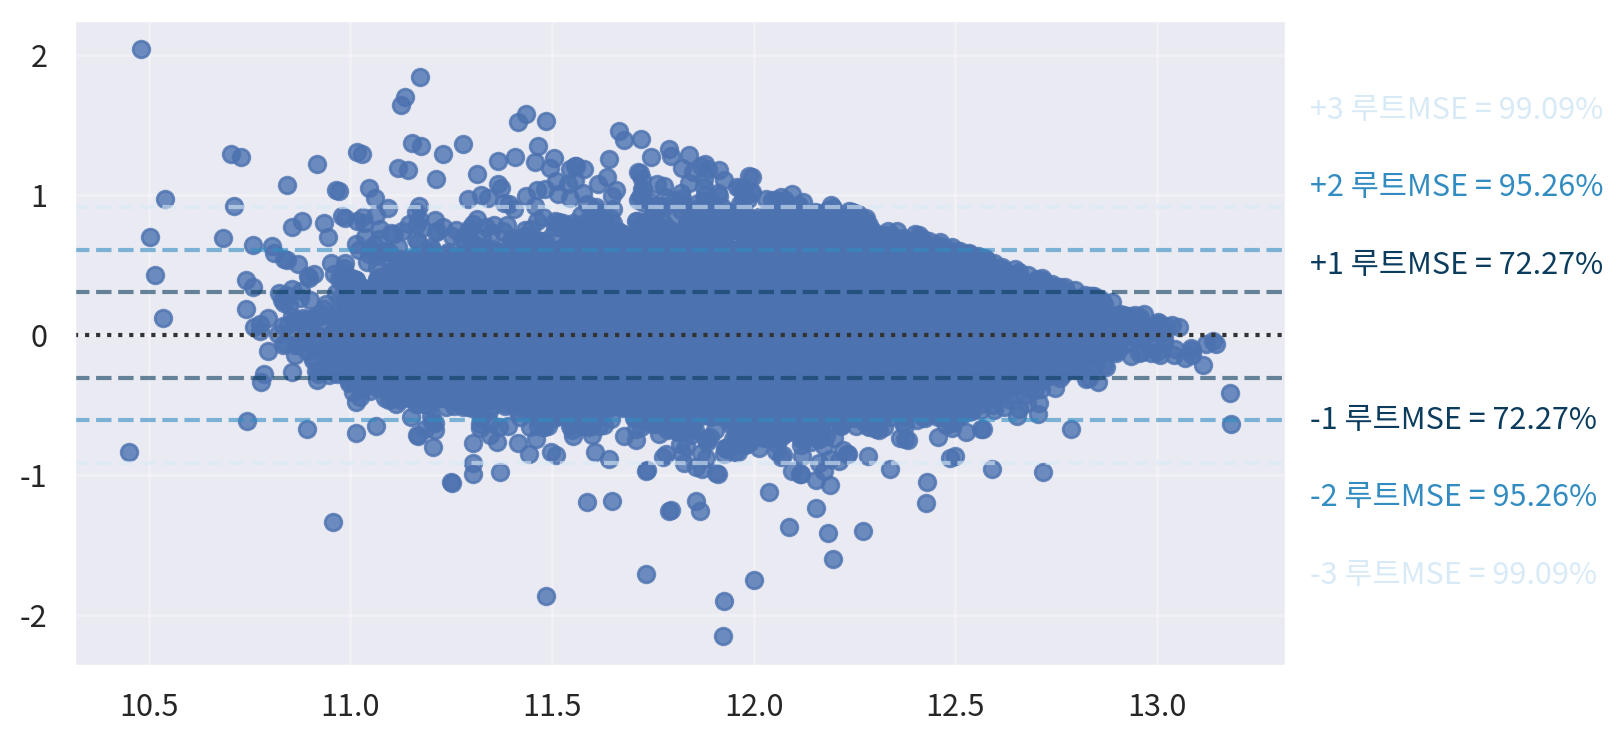

In [218]:
mse_sq = fit.mse_resid
mse_root = np.sqrt(mse_sq)
r = fit.resid       #잔차

r1 = r[(r>-mse_root) & (r<mse_root)].count() / r.count() * 100
r2 = r[(r>-2*mse_root) & (r<2*mse_root)].count() / r.count() * 100
r3 = r[(r>-3*mse_root) & (r<3*mse_root)].count() / r.count() * 100

mse_r = [r1, r2, r3]
colors = ["#0b3C5D", "#328CC1", "#D9EAF7"]

xmax = fit.fittedvalues.max()
ymin = fit.fittedvalues.min()

width_px = 1600
height_px = 720
figsize = (width_px / my_dpi, height_px / my_dpi)
fig, ax = plt.subplots(1, 1, dpi=my_dpi, figsize=figsize, constrained_layout=True)

sb.residplot(x=fit.fittedvalues, y=fit.resid)

ax.grid(True, alpha=0.3)

for i, c in enumerate(colors):
    k= i + 1

    y_pos = k*mse_root
    ax.axhline(y=y_pos, color=c, linestyle="--", alpha=0.6)
    ax.axhline(y=-y_pos, color=c, linestyle="--", alpha=0.6)

    ax.text(x=1.02, y=0.5 + 0.12*k,
            s=f"+{k} 루트MSE = {mse_r[i]:0.2f}%",
            transform=ax.transAxes,
            ha="left", va="center", fontsize=11, color=c)
    
    ax.text(x=1.02, y=0.5 - 0.12*k,
            s=f"-{k} 루트MSE = {mse_r[i]:0.2f}%",
            transform=ax.transAxes,
            ha="left", va="center", fontsize=11, color=c)

plt.show()
plt.close()

In [192]:
if len(origin) < 5000:
    method = "Shapiro-Wilk"
    stat, p = shapiro(fit.resid)
    print(f"{method} statistic: {stat:.4f}, p-value:{p:.4f}")
    violated=p<0.05
else:
    method = "Anderson-Darling"
    ad_res = anderson(fit.resid, dist='norm')
    crit_levels = ad_res.significance_level.tolist()
    crit_values = ad_res.critical_values.tolist()
    crit_5 = crit_values[crit_levels.index(5.0)] if 5.0 in crit_levels else None
    print(f"{method} statistic: {ad_res.statistic:.4f}, 5% 임계값: {crit_5:.4f}")
    violated = crit_5 is not None and ad_res.statistic > crit_5

print("정규성 가정 위배 가능성이 있음 (5% 유의수준)" if violated else "정규성 가정 위배 근거 없음 (5% 유의수준)")

Anderson-Darling statistic: 86.8700, 5% 임계값: 0.7870
정규성 가정 위배 가능성이 있음 (5% 유의수준)


In [193]:
# Breusch-Pagan Test
names = ['LM statistic', 'LM p-value', 'F Statistic', 'F p-value']
bp_test = het_breuschpagan(fit.resid, fit.model.exog)
bp = DataFrame(bp_test, index=names, columns=['value'])

# p-value는 F p-value를 기준으로 사용
p_bp = bp.loc['F p-value','value']

print(f"Breusch-Pagna statistic: {bp.loc['F Statistic','value']:.3f}, p-value: {p_bp:.3f}")
print(f"{'이분산성 존재(등분산 아님)' if p_bp <= 0.05 else '등분산성 만족'}")

Breusch-Pagna statistic: 55.024, p-value: 0.000
이분산성 존재(등분산 아님)


In [194]:
dw = durbin_watson(fit.resid)

if 1.5<= dw<= 2.5:
    interpretation = "잔차는 독립성을 만족함(자기상관 없음)"
elif dw<1.5:
    interpretation = "잔차는 양(+)의 자기상관이 존재할 가능성 있음(독립성 위반)"
else:
    interpretation = "잔차는 음(-)의 자기상관이 존재할 가능성 있음(독립성 위반)"

print(f"Durbin-Watson: {dw:.3f}")
print(interpretation)

Durbin-Watson: 0.890
잔차는 양(+)의 자기상관이 존재할 가능성 있음(독립성 위반)


In [195]:
m

'median_house_value에 대하여 median_income,ocean_proximity_INLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN,CLUSTER_ID_1,CLUSTER_ID_2,CLUSTER_ID_3,CLUSTER_ID_4,CLUSTER_ID_5로 예측하는 회귀분석을 실시한 결과, 이 회귀모형은 통계적으로 유의하다(F(9,18560) = 4038., p <= 0.05).'

In [196]:
print("\n".join(v))

median_income의 회귀계수는 0.8322(p <= 0.05)로, median_house_value에 대하여 유의한 예측변인인 것으로 나타났다.
ocean_proximity_INLAND의 회귀계수는 -0.3909(p <= 0.05)로, median_house_value에 대하여 유의한 예측변인인 것으로 나타났다.
ocean_proximity_NEAR BAY의 회귀계수는 -0.0939(p <= 0.05)로, median_house_value에 대하여 유의한 예측변인인 것으로 나타났다.
ocean_proximity_NEAR OCEAN의 회귀계수는 0.1405(p <= 0.05)로, median_house_value에 대하여 유의한 예측변인인 것으로 나타났다.
CLUSTER_ID_1의 회귀계수는 0.1378(p <= 0.05)로, median_house_value에 대하여 유의한 예측변인인 것으로 나타났다.
CLUSTER_ID_2의 회귀계수는 0.0540(p <= 0.05)로, median_house_value에 대하여 유의한 예측변인인 것으로 나타났다.
CLUSTER_ID_3의 회귀계수는 0.2932(p <= 0.05)로, median_house_value에 대하여 유의한 예측변인인 것으로 나타났다.
CLUSTER_ID_4의 회귀계수는 0.3536(p <= 0.05)로, median_house_value에 대하여 유의한 예측변인인 것으로 나타났다.
CLUSTER_ID_5의 회귀계수는 0.4125(p <= 0.05)로, median_house_value에 대하여 유의한 예측변인인 것으로 나타났다.
